## 0. Imports and Setup

In [1]:
import pandas as pd
import shap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import optuna  # For hyperparameter optimization
import plotly.express as px
from yellowbrick.regressor import ResidualsPlot
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Target: 4m1

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load data and split
data_path = "data/ml_6m.csv"
data = pd.read_csv(data_path, encoding="latin1")
X = data[[
    '4m1_h','density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]]
y = data['4m1']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 3. Parameter dictionary (matches the previous XGBRegressor hyperparameters)
params = {
    "colsample_bytree": 0.971021535633834,
    "learning_rate":    0.05565376348878588,
    "max_depth":        5,
    "reg_lambda":       0.06637427327177005,
    "subsample":        0.9914242419674056,
    "objective":        "reg:squarederror",
    "seed":             42,
    "verbosity":        1
}

# 4. Call xgb.train and enable early stopping
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=539,                     # Matches n_estimators
    evals=[(dtest, "eval")],                 # Monitor validation RMSE
    early_stopping_rounds=10,                # Stop after 10 rounds with no improvement
    verbose_eval=True                        # Print the eval log each round
)

print(f"Best iteration: {bst.best_iteration}")
print(f"Best eval-score (RMSE): {bst.best_score:.5f}")

# 5. Predict & evaluate
y_train_pred = bst.predict(dtrain)
y_test_pred  = bst.predict(dtest)

print("\nTraining Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred),
    r2_score(y_train, y_train_pred)
))

print("\nTesting Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_test, y_test_pred),
    mean_absolute_error(y_test, y_test_pred),
    r2_score(y_test, y_test_pred)
))


[0]	eval-rmse:3.15757
[1]	eval-rmse:3.01623
[2]	eval-rmse:2.92459
[3]	eval-rmse:2.80095
[4]	eval-rmse:2.67171
[5]	eval-rmse:2.56102
[6]	eval-rmse:2.46108
[7]	eval-rmse:2.37789
[8]	eval-rmse:2.28823
[9]	eval-rmse:2.21683
[10]	eval-rmse:2.13231
[11]	eval-rmse:2.05307
[12]	eval-rmse:1.98887
[13]	eval-rmse:1.93208
[14]	eval-rmse:1.86914
[15]	eval-rmse:1.81038
[16]	eval-rmse:1.75408
[17]	eval-rmse:1.70703
[18]	eval-rmse:1.66008
[19]	eval-rmse:1.61521
[20]	eval-rmse:1.58203
[21]	eval-rmse:1.54152
[22]	eval-rmse:1.51143
[23]	eval-rmse:1.50196
[24]	eval-rmse:1.48595
[25]	eval-rmse:1.46922
[26]	eval-rmse:1.45305
[27]	eval-rmse:1.43615
[28]	eval-rmse:1.41418
[29]	eval-rmse:1.39545
[30]	eval-rmse:1.38486
[31]	eval-rmse:1.37631
[32]	eval-rmse:1.37177
[33]	eval-rmse:1.35747
[34]	eval-rmse:1.34280
[35]	eval-rmse:1.33169
[36]	eval-rmse:1.31956
[37]	eval-rmse:1.30966
[38]	eval-rmse:1.30284
[39]	eval-rmse:1.30256
[40]	eval-rmse:1.29257
[41]	eval-rmse:1.28539
[42]	eval-rmse:1.27614
[43]	eval-rmse:1.2691

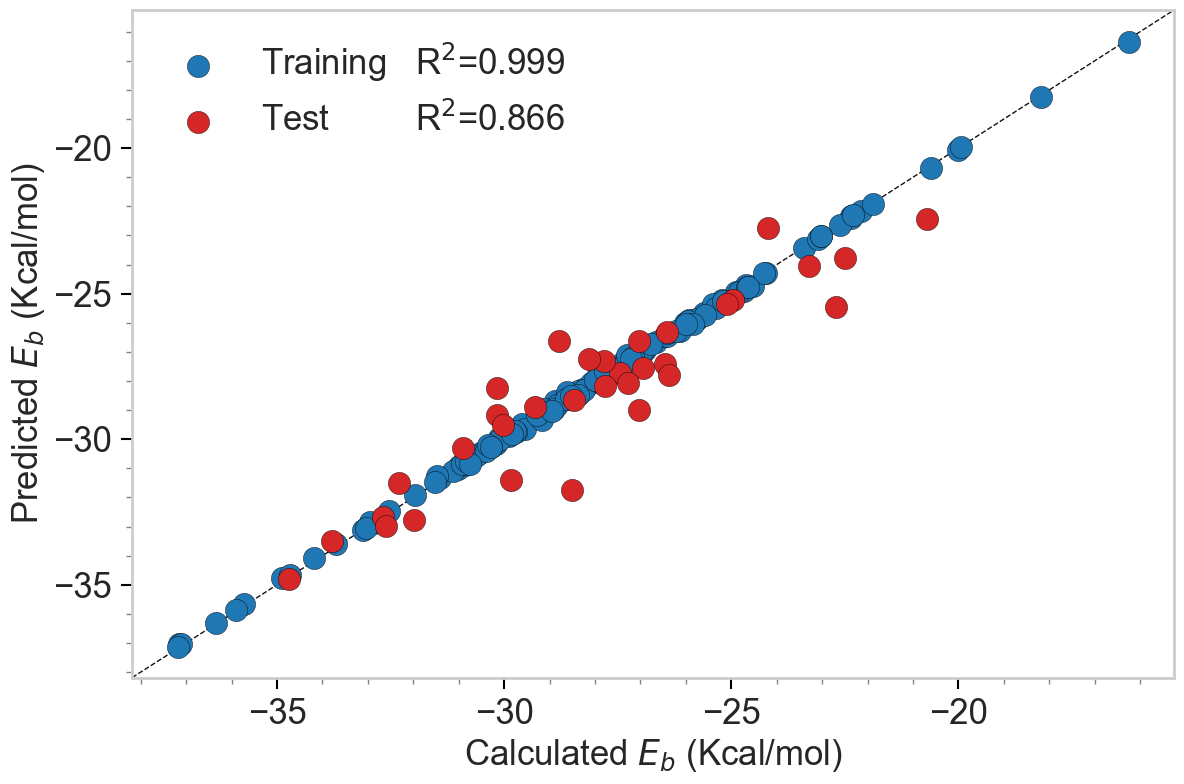

The figure layout has changed to tight


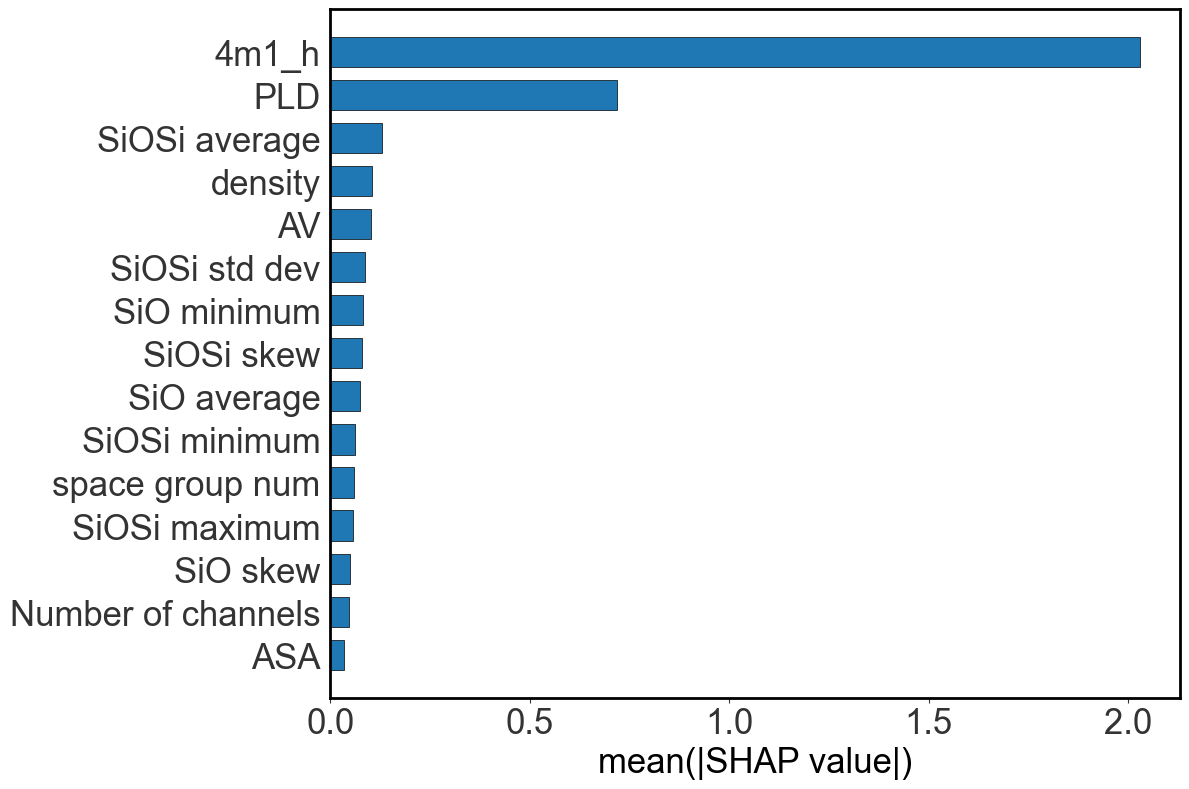

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assume y_train, y_test, y_train_pred, and y_test_pred already exist

# 1. Compute R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

# 2. Configure fonts
font       = {'family': 'Arial', 'size': 25}
ticks_font = {'fontname': 'Arial', 'size': 25}

# 3. Auto-compute axis range
x_min = min(np.min(y_train), np.min(y_test)) - 1
x_max = max(np.max(y_train), np.max(y_test)) + 1
diag  = np.linspace(x_min, x_max, 100)

# 4. Plot
fig, ax = plt.subplots(figsize=(12, 8))
dx = 256

# 4.1 Diagonal reference (no label or legend entry)
ax.plot(diag, diag, "--k", linewidth=1, zorder=1)


# Recommended palette (ColorBrewer friendly)
train_color = '#1f77b4'     
test_color  = '#d62728'     

# Fitted scatter plot
ax.scatter(
    y_train, y_train_pred,
    color=train_color,
    edgecolors='black',
    s=dx,                     # Marker size (e.g., dx=30)
    label=f"Training   R$^2$={r2_train:.3f}",
    zorder=2
)

ax.scatter(
    y_test, y_test_pred,
    color=test_color,
    edgecolors='black',
    s=dx,
    label=f"Test         R$^2$={r2_test:.3f}",
    zorder=2
)

# 5. Disable grid
ax.grid(False)

# 6. Add major/minor ticks
ax.minorticks_on()
# Major ticks: slightly longer and black
ax.tick_params(axis='both', which='major',
               direction='out', length=8, width=1.5, color='black')
# Minor ticks: shorter and lighter gray
ax.tick_params(axis='both', which='minor',
               direction='out', length=4, width=1, color='grey')

# 7. Tick label font
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontname(ticks_font['fontname'])
    lbl.set_fontsize(ticks_font['size'])

# 8. Axis labels: binding energy shorthand $E_b$
ax.set_xlabel("Calculated $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)
ax.set_ylabel("Predicted $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)

# 9. Force identical axis limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([x_min, x_max])

# 10. Keep only training/test legend entries
ax.legend(prop=font, frameon=False, loc='upper left')

# Set spine width
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

# 11. Save and show
plt.tight_layout()
plt.savefig('prediction_Eb_4m1.jpg', dpi=600)
plt.show()
import shap
import matplotlib.pyplot as plt

# --- 1. Compute SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)

# --- 2. Font and palette settings
font = {'family': 'Arial', 'size': 25}

# --- 3. Build a single 12x8 figure/axis
plt.style.use('default')  # Reset the style
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 100

# --- 4. Pass the axis into shap.summary_plot so it respects our figure size
shap.summary_plot(
    shap_values,
    X_train,
    plot_type="bar",
    max_display=15,
    show=False,
    plot_size=None  # Prevent SHAP from overriding the figure size
)

# --- 5. Style the active axis
current_ax = plt.gca()
current_ax.set_xlabel("mean(|SHAP value|)", fontdict=font)
current_ax.xaxis.set_major_locator(plt.MaxNLocator(5))
current_ax.grid(False)

# Set font
for lbl in current_ax.get_xticklabels() + current_ax.get_yticklabels():
    lbl.set_fontname('Arial')
    lbl.set_fontsize(25)

# Draw axis spines
for spine in current_ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2.0)

# Style the bar chart
for patch in current_ax.patches:
    patch.set_facecolor('#1f77b4')
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Style text annotations
for txt in current_ax.texts:
    txt.set_fontname('Arial')
    txt.set_fontsize(25)
    txt.set_color('#404040')

# --- 6. Save without tight cropping
plt.tight_layout()
fig = plt.gcf()  # Grab the current figure
fig.savefig(
    'shap_bar_4m1_correct.png',
    dpi=600,
    bbox_inches=None    # Keep the entire 12x8 canvas
)
plt.show()


## Target: 4m6

In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load data and split
data_path = "data/ml_6m.csv"
data = pd.read_csv(data_path, encoding="latin1")
X = data[[
    '4m6_h','density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]]
y = data['4m6']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 3. Parameter dictionary (matches the previous XGBRegressor hyperparameters)
params = {
    'colsample_bytree': 0.7125068895262885,
    'learning_rate': 0.018731177641084215,
    'max_depth': 5,
    'subsample': 0.620007775044046,
    'reg_alpha': 0.05951022753203051,
    'reg_lambda': 0.3065581906906516,
    'objective': 'reg:squarederror',
    'seed': 42,
    'verbosity': 0,
}


# 4. Call xgb.train and enable early stopping
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=539,                     # Matches n_estimators
    evals=[(dtest, "eval")],                 # Monitor validation RMSE
    early_stopping_rounds=10,                # Stop after 10 rounds with no improvement
    verbose_eval=True                        # Print the eval log each round
)

print(f"Best iteration: {bst.best_iteration}")
print(f"Best eval-score (RMSE): {bst.best_score:.5f}")

# 5. Predict & evaluate
y_train_pred = bst.predict(dtrain)
y_test_pred  = bst.predict(dtest)

print("\nTraining Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred),
    r2_score(y_train, y_train_pred)
))

print("\nTesting Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_test, y_test_pred),
    mean_absolute_error(y_test, y_test_pred),
    r2_score(y_test, y_test_pred)
))


[0]	eval-rmse:4.01281
[1]	eval-rmse:3.96134
[2]	eval-rmse:3.91611
[3]	eval-rmse:3.87980
[4]	eval-rmse:3.82378
[5]	eval-rmse:3.80417
[6]	eval-rmse:3.75370
[7]	eval-rmse:3.70451
[8]	eval-rmse:3.66088
[9]	eval-rmse:3.60818
[10]	eval-rmse:3.55355
[11]	eval-rmse:3.50164
[12]	eval-rmse:3.46173
[13]	eval-rmse:3.40469
[14]	eval-rmse:3.35622
[15]	eval-rmse:3.29880
[16]	eval-rmse:3.29048
[17]	eval-rmse:3.24957
[18]	eval-rmse:3.21038
[19]	eval-rmse:3.16997
[20]	eval-rmse:3.12004
[21]	eval-rmse:3.07127
[22]	eval-rmse:3.02184
[23]	eval-rmse:2.98510
[24]	eval-rmse:2.94562
[25]	eval-rmse:2.90863
[26]	eval-rmse:2.86747
[27]	eval-rmse:2.83483
[28]	eval-rmse:2.79803
[29]	eval-rmse:2.75768
[30]	eval-rmse:2.71418
[31]	eval-rmse:2.69845
[32]	eval-rmse:2.68394
[33]	eval-rmse:2.65100
[34]	eval-rmse:2.62201
[35]	eval-rmse:2.58762
[36]	eval-rmse:2.55609
[37]	eval-rmse:2.53392
[38]	eval-rmse:2.50434
[39]	eval-rmse:2.50080
[40]	eval-rmse:2.48157
[41]	eval-rmse:2.44496
[42]	eval-rmse:2.41711
[43]	eval-rmse:2.4046

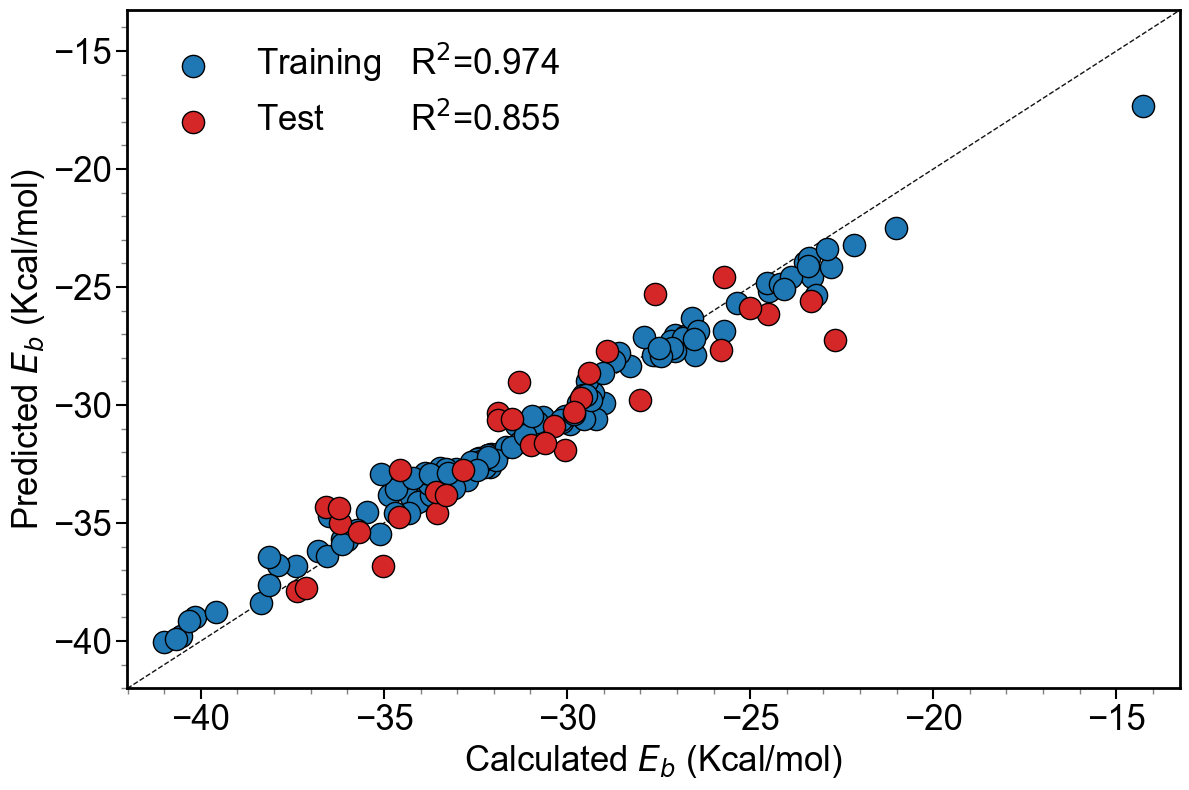

The figure layout has changed to tight


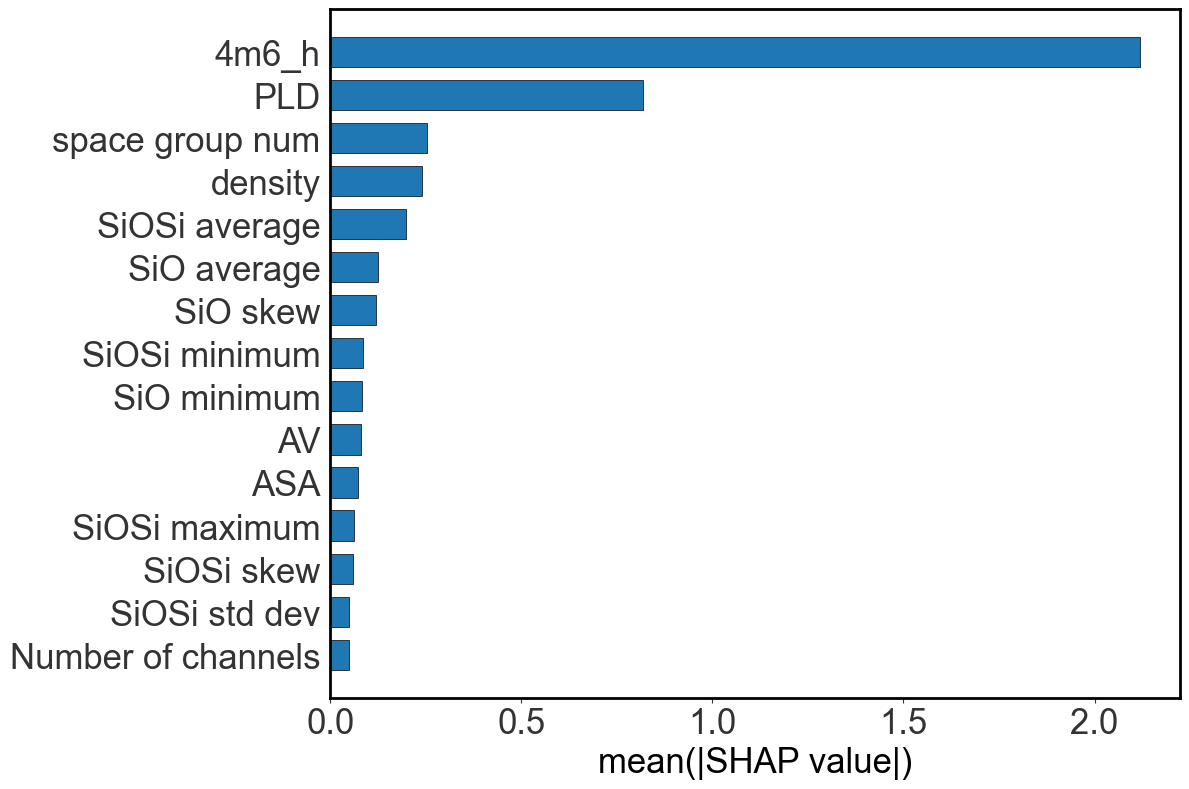

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assume y_train, y_test, y_train_pred, and y_test_pred already exist

# 1. Compute R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

# 2. Configure fonts
font       = {'family': 'Arial', 'size': 25}
ticks_font = {'fontname': 'Arial', 'size': 25}

# 3. Auto-compute axis range
x_min = min(np.min(y_train), np.min(y_test)) - 1
x_max = max(np.max(y_train), np.max(y_test)) + 1
diag  = np.linspace(x_min, x_max, 100)

# 4. Plot
fig, ax = plt.subplots(figsize=(12, 8))
dx = 256

# 4.1 Diagonal reference (no label or legend entry)
ax.plot(diag, diag, "--k", linewidth=1, zorder=1)


# Recommended palette (ColorBrewer friendly)
train_color = '#1f77b4'     
test_color  = '#d62728'     

# Fitted scatter plot
ax.scatter(
    y_train, y_train_pred,
    color=train_color,
    edgecolors='black',
    s=dx,                     # Marker size (e.g., dx=30)
    label=f"Training   R$^2$={r2_train:.3f}",
    zorder=2
)

ax.scatter(
    y_test, y_test_pred,
    color=test_color,
    edgecolors='black',
    s=dx,
    label=f"Test         R$^2$={r2_test:.3f}",
    zorder=2
)

# 5. Disable grid
ax.grid(False)

# 6. Add major/minor ticks
ax.minorticks_on()
# Major ticks: slightly longer and black
ax.tick_params(axis='both', which='major',
               direction='out', length=8, width=1.5, color='black')
# Minor ticks: shorter and lighter gray
ax.tick_params(axis='both', which='minor',
               direction='out', length=4, width=1, color='grey')

# 7. Tick label font
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontname(ticks_font['fontname'])
    lbl.set_fontsize(ticks_font['size'])

# 8. Axis labels: binding energy shorthand $E_b$
ax.set_xlabel("Calculated $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)
ax.set_ylabel("Predicted $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)

# 9. Force identical axis limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([x_min, x_max])

# 10. Keep only training/test legend entries
ax.legend(prop=font, frameon=False, loc='upper left')

# Set spine width
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

# 11. Save and show
plt.tight_layout()
plt.savefig('prediction_Eb_4m6.jpg', dpi=600)
plt.show()
import shap
import matplotlib.pyplot as plt

# --- 1. Compute SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)

# --- 2. Font and palette settings
font = {'family': 'Arial', 'size': 25}

# --- 3. Build a single 12x8 figure/axis
plt.style.use('default')  # Reset the style
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 100

# --- 4. Pass the axis into shap.summary_plot so it respects our figure size
shap.summary_plot(
    shap_values,
    X_train,
    plot_type="bar",
    max_display=15,
    show=False,
    plot_size=None  # Prevent SHAP from overriding the figure size
)

# --- 5. Style the active axis
current_ax = plt.gca()
current_ax.set_xlabel("mean(|SHAP value|)", fontdict=font)
current_ax.xaxis.set_major_locator(plt.MaxNLocator(5))
current_ax.grid(False)

# Set font
for lbl in current_ax.get_xticklabels() + current_ax.get_yticklabels():
    lbl.set_fontname('Arial')
    lbl.set_fontsize(25)

# Draw axis spines
for spine in current_ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2.0)

# Style the bar chart
for patch in current_ax.patches:
    patch.set_facecolor('#1f77b4')
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Style text annotations
for txt in current_ax.texts:
    txt.set_fontname('Arial')
    txt.set_fontsize(25)
    txt.set_color('#404040')

# --- 6. Save without tight cropping
plt.tight_layout()
fig = plt.gcf()  # Grab the current figure
fig.savefig(
    'shap_bar_4m6_correct.png',
    dpi=600,
    bbox_inches=None    # Keep the entire 12x8 canvas
)
plt.show()


In [187]:
# 20000
target = '4m6'  # Current target variable
features = [
    f"{target}_h", 'density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV']

# Generate predictions
data_path = "data/prediction.csv"  # Replace with your dataset file path
data = pd.read_csv(data_path, encoding="latin1")
X = data[features]
d_X=xgb.DMatrix(X)
predictions = bst.predict(d_X)

# Build the output table
output_df = pd.DataFrame({
    'zeolite': data['zeolite'],  # Assumes the source data includes the zeolite column
    f'{target}_p': predictions  # Creates the <target>_p column
})

# Save as CSV
output_df.to_csv(f'{target}_20000.csv', index=False)

## Target: 4m11

In [36]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load data and split
data = pd.read_csv("data/ml_6m.csv")
X = data[[
    '4m11_h','density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]]
y = data['4m11']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 3. Parameter dictionary (matches the earlier XGBRegressor setup)
params = {
    "colsample_bytree": 0.6705592414877072,
    "learning_rate":    0.2987570926636589,
    "max_depth":        3,
    "reg_lambda":       0.9081477797369547,
    "subsample":        0.6735387850016863,
    "objective":        "reg:squarederror",
    "seed":             42,
    "verbosity":        0
}

# 4. Native train interface with early stopping
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=347,                    # Matches the prior n_estimators
    evals=[(dtest, "eval")],                # Monitor validation metrics
    early_stopping_rounds=10,               # Stop after 10 rounds with no improvement
    verbose_eval=True                       # Print metrics each round
)

print(f"Best iteration: {bst.best_iteration}")
print(f"Best eval-score: {bst.best_score:.5f}")

# 5. Predict & evaluate
y_train_pred = bst.predict(dtrain)
y_test_pred  = bst.predict(dtest)

print("\nTraining Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred),
    r2_score(y_train, y_train_pred)
))

print("\nTesting Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_test, y_test_pred),
    mean_absolute_error(y_test, y_test_pred),
    r2_score(y_test, y_test_pred)
))


[0]	eval-rmse:3.35152
[1]	eval-rmse:2.67423
[2]	eval-rmse:2.47297
[3]	eval-rmse:2.50284
[4]	eval-rmse:2.14015
[5]	eval-rmse:2.10751
[6]	eval-rmse:1.91656
[7]	eval-rmse:1.84307
[8]	eval-rmse:1.77845
[9]	eval-rmse:1.74710
[10]	eval-rmse:1.70007
[11]	eval-rmse:1.67392
[12]	eval-rmse:1.66197
[13]	eval-rmse:1.65475
[14]	eval-rmse:1.65002
[15]	eval-rmse:1.66383
[16]	eval-rmse:1.70202
[17]	eval-rmse:1.73567
[18]	eval-rmse:1.69994
[19]	eval-rmse:1.72970
[20]	eval-rmse:1.71472
[21]	eval-rmse:1.70859
[22]	eval-rmse:1.74085
[23]	eval-rmse:1.74698
[24]	eval-rmse:1.73031
Best iteration: 14
Best eval-score: 1.65002

Training Set Performance:
 MSE: 0.498, MAE: 0.569, R2: 0.981

Testing Set Performance:
 MSE: 2.994, MAE: 1.313, R2: 0.809


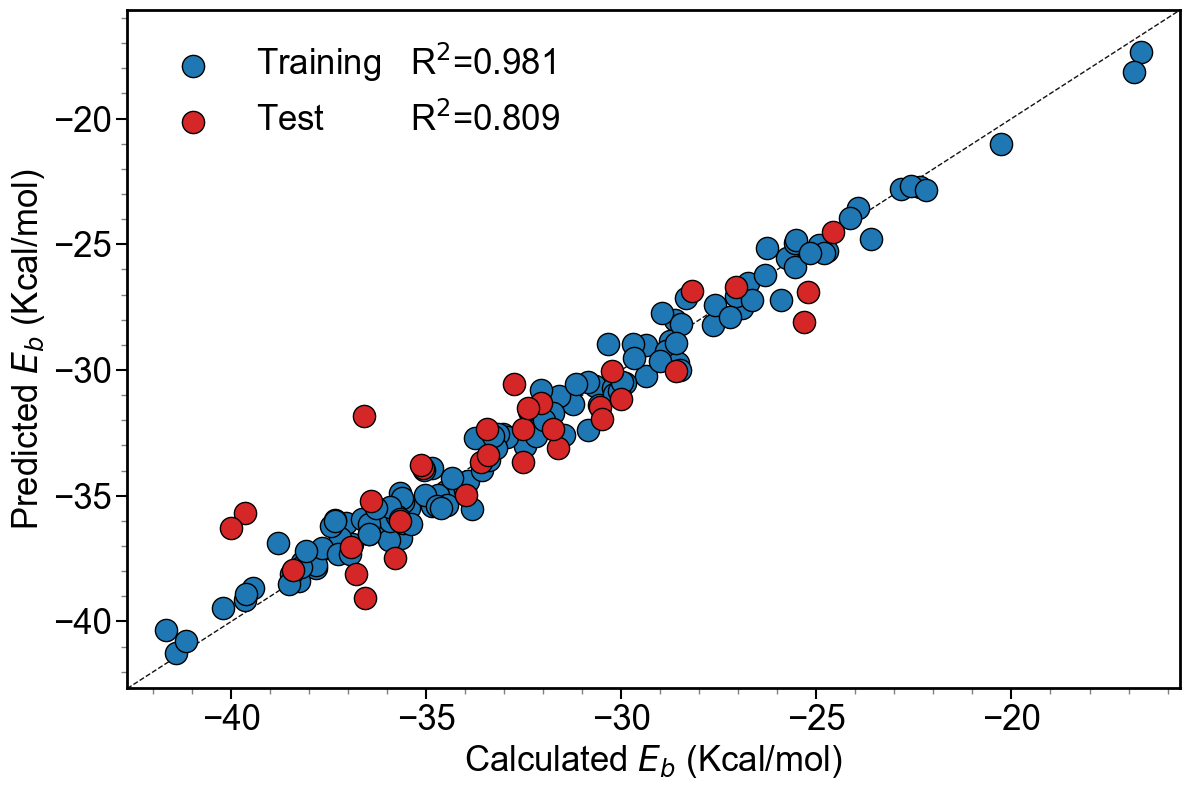

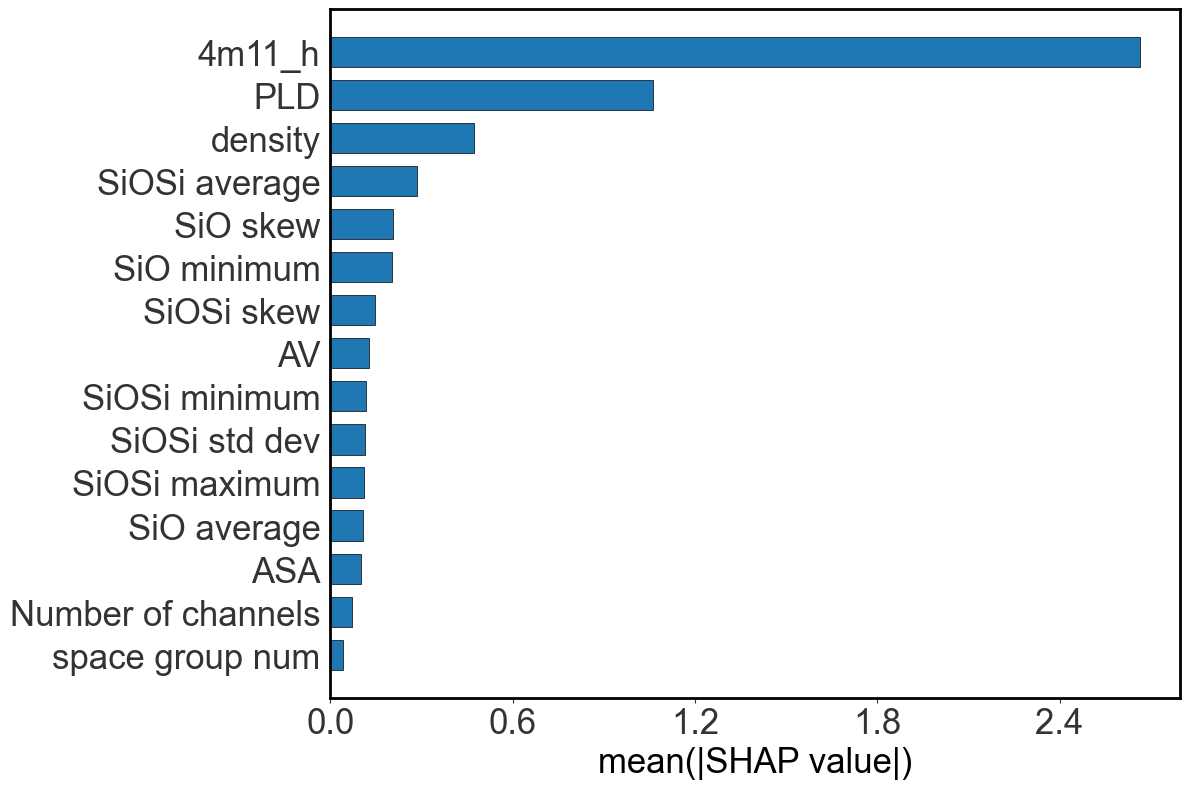

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assume y_train, y_test, y_train_pred, and y_test_pred already exist

# 1. Compute R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

# 2. Configure fonts
font       = {'family': 'Arial', 'size': 25}
ticks_font = {'fontname': 'Arial', 'size': 25}

# 3. Auto-compute axis range
x_min = min(np.min(y_train), np.min(y_test)) - 1
x_max = max(np.max(y_train), np.max(y_test)) + 1
diag  = np.linspace(x_min, x_max, 100)

# 4. Plot
fig, ax = plt.subplots(figsize=(12, 8))
dx = 256

# 4.1 Diagonal reference (no label or legend entry)
ax.plot(diag, diag, "--k", linewidth=1, zorder=1)


# Recommended palette (ColorBrewer friendly)
train_color = '#1f77b4'     
test_color  = '#d62728'     

# Fitted scatter plot
ax.scatter(
    y_train, y_train_pred,
    color=train_color,
    edgecolors='black',
    s=dx,                     # Marker size (e.g., dx=30)
    label=f"Training   R$^2$={r2_train:.3f}",
    zorder=2
)

ax.scatter(
    y_test, y_test_pred,
    color=test_color,
    edgecolors='black',
    s=dx,
    label=f"Test         R$^2$={r2_test:.3f}",
    zorder=2
)

# 5. Disable grid
ax.grid(False)

# 6. Add major/minor ticks
ax.minorticks_on()
# Major ticks: slightly longer and black
ax.tick_params(axis='both', which='major',
               direction='out', length=8, width=1.5, color='black')
# Minor ticks: shorter and lighter gray
ax.tick_params(axis='both', which='minor',
               direction='out', length=4, width=1, color='grey')

# 7. Tick label font
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontname(ticks_font['fontname'])
    lbl.set_fontsize(ticks_font['size'])

# 8. Axis labels: binding energy shorthand $E_b$
ax.set_xlabel("Calculated $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)
ax.set_ylabel("Predicted $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)

# 9. Force identical axis limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([x_min, x_max])

# 10. Keep only training/test legend entries
ax.legend(prop=font, frameon=False, loc='upper left')

# Set spine width
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

# 11. Save and show
plt.tight_layout()
plt.savefig('prediction_Eb_4m11.jpg', dpi=600)
plt.show()
import shap
import matplotlib.pyplot as plt

# --- 1. Compute SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)

# --- 2. Font and palette settings
font = {'family': 'Arial', 'size': 25}

# --- 3. Build a single 12x8 figure/axis
plt.style.use('default')  # Reset the style
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 100

# --- 4. Pass the axis into shap.summary_plot so it respects our figure size
shap.summary_plot(
    shap_values,
    X_train,
    plot_type="bar",
    max_display=15,
    show=False,
    plot_size=None  # Prevent SHAP from overriding the figure size
)

# --- 5. Style the active axis
current_ax = plt.gca()
current_ax.set_xlabel("mean(|SHAP value|)", fontdict=font)
current_ax.xaxis.set_major_locator(plt.MaxNLocator(5))
current_ax.grid(False)

# Set font
for lbl in current_ax.get_xticklabels() + current_ax.get_yticklabels():
    lbl.set_fontname('Arial')
    lbl.set_fontsize(25)

# Draw axis spines
for spine in current_ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2.0)

# Style the bar chart
for patch in current_ax.patches:
    patch.set_facecolor('#1f77b4')
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Style text annotations
for txt in current_ax.texts:
    txt.set_fontname('Arial')
    txt.set_fontsize(25)
    txt.set_color('#404040')

# --- 6. Save without tight cropping
plt.tight_layout()
fig = plt.gcf()  # Grab the current figure
fig.savefig(
    'shap_bar_4m11_correct.png',
    dpi=600,
    bbox_inches=None    # Keep the entire 12x8 canvas
)
plt.show()


In [168]:
# 20000
target = '4m11'  # Current target variable
features = [
    f"{target}_h", 'density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV']

# Generate predictions
data_path = "data/prediction.csv"  # Replace with your dataset file path
data = pd.read_csv(data_path, encoding="latin1")
X = data[features]
d_X=xgb.DMatrix(X)
predictions = bst.predict(d_X)

# Build the output table
output_df = pd.DataFrame({
    'zeolite': data['zeolite'],  # Assumes the source data includes the zeolite column
    f'{target}_p': predictions  # Creates the <target>_p column
})

# Save as CSV
output_df.to_csv(f'{target}_20000.csv', index=False)

## Target: 4l3

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load data and split
data = pd.read_csv("data/ml_6m.csv")
X = data[[
    '4l3_h','density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]]
y = data['4l3']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 3. Parameter dictionary (matches the earlier XGBRegressor setup)
params = {
    'colsample_bytree': 0.8063797205401236,
    'learning_rate': 0.0453377961980457,
    'max_depth': 6,
    'subsample': 0.7018970886170427,
    'reg_alpha': 0.008784551583434047,
    'reg_lambda': 0.028364528700723094,
    'objective': 'reg:squarederror',
    'seed': 42,
    'verbosity': 0,
}


# 4. Native train interface with early stopping
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=347,                    # Matches the prior n_estimators
    evals=[(dtest, "eval")],                # Monitor validation metrics
    early_stopping_rounds=10,               # Stop after 10 rounds with no improvement
    verbose_eval=True                       # Print metrics each round
)

print(f"Best iteration: {bst.best_iteration}")
print(f"Best eval-score: {bst.best_score:.5f}")

# 5. Predict & evaluate
y_train_pred = bst.predict(dtrain)
y_test_pred  = bst.predict(dtest)

print("\nTraining Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred),
    r2_score(y_train, y_train_pred)
))

print("\nTesting Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_test, y_test_pred),
    mean_absolute_error(y_test, y_test_pred),
    r2_score(y_test, y_test_pred)
))


[0]	eval-rmse:3.50224
[1]	eval-rmse:3.36546
[2]	eval-rmse:3.32037
[3]	eval-rmse:3.18324
[4]	eval-rmse:3.03801
[5]	eval-rmse:3.00904
[6]	eval-rmse:2.87343
[7]	eval-rmse:2.71470
[8]	eval-rmse:2.59416
[9]	eval-rmse:2.55501
[10]	eval-rmse:2.45957
[11]	eval-rmse:2.34013
[12]	eval-rmse:2.24172
[13]	eval-rmse:2.14118
[14]	eval-rmse:2.05247
[15]	eval-rmse:1.95366
[16]	eval-rmse:1.88670
[17]	eval-rmse:1.80252
[18]	eval-rmse:1.73760
[19]	eval-rmse:1.68453
[20]	eval-rmse:1.64289
[21]	eval-rmse:1.58145
[22]	eval-rmse:1.54038
[23]	eval-rmse:1.50971
[24]	eval-rmse:1.46171
[25]	eval-rmse:1.40966
[26]	eval-rmse:1.37319
[27]	eval-rmse:1.36030
[28]	eval-rmse:1.32721
[29]	eval-rmse:1.29069
[30]	eval-rmse:1.26657
[31]	eval-rmse:1.25303
[32]	eval-rmse:1.23417
[33]	eval-rmse:1.22462
[34]	eval-rmse:1.19346
[35]	eval-rmse:1.17408
[36]	eval-rmse:1.15471
[37]	eval-rmse:1.13947
[38]	eval-rmse:1.12368
[39]	eval-rmse:1.12748
[40]	eval-rmse:1.11680
[41]	eval-rmse:1.10759
[42]	eval-rmse:1.09362
[43]	eval-rmse:1.0822

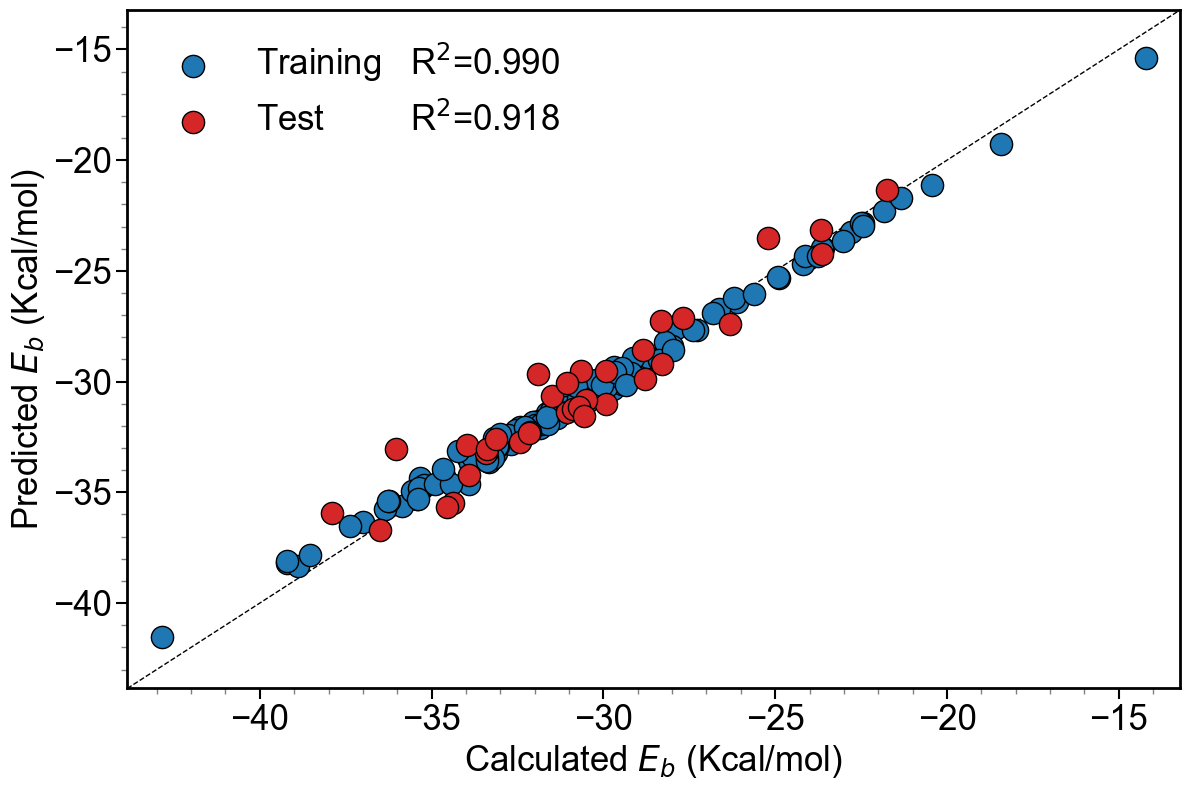

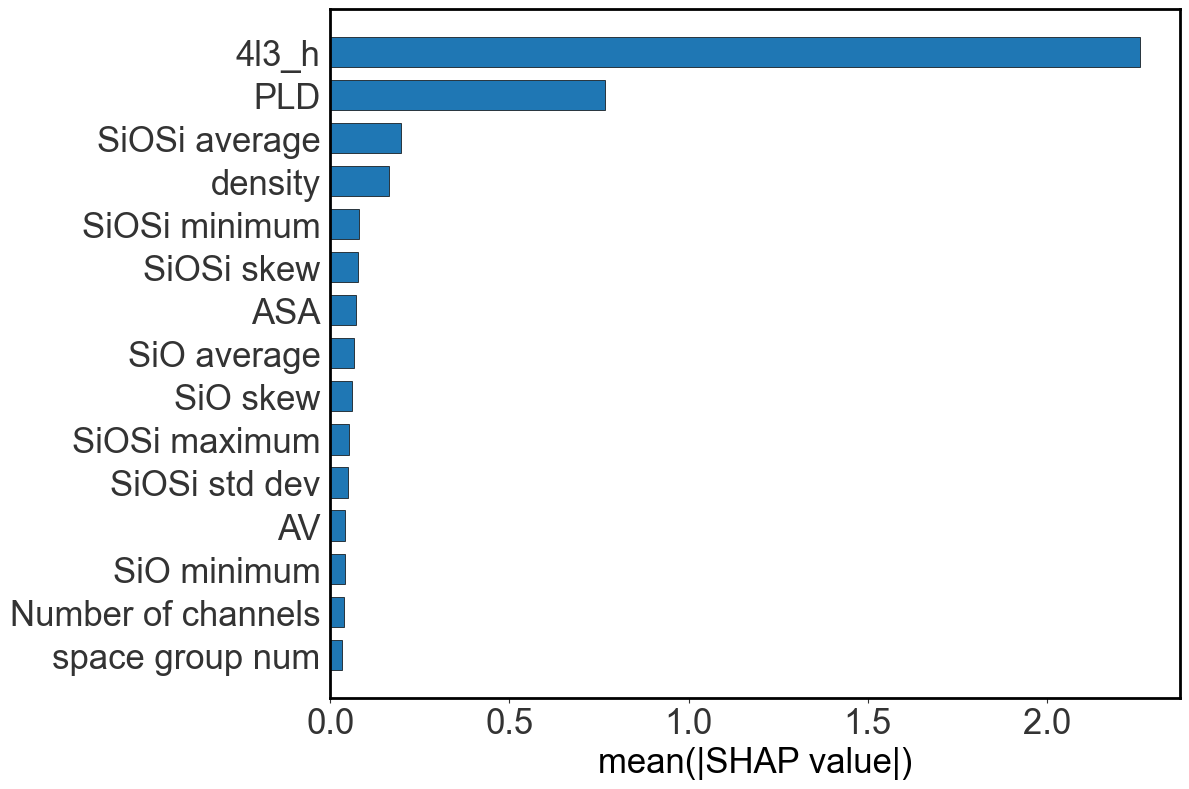

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assume y_train, y_test, y_train_pred, and y_test_pred already exist

# 1. Compute R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

# 2. Configure fonts
font       = {'family': 'Arial', 'size': 25}
ticks_font = {'fontname': 'Arial', 'size': 25}

# 3. Auto-compute axis range
x_min = min(np.min(y_train), np.min(y_test)) - 1
x_max = max(np.max(y_train), np.max(y_test)) + 1
diag  = np.linspace(x_min, x_max, 100)

# 4. Plot
fig, ax = plt.subplots(figsize=(12, 8))
dx = 256

# 4.1 Diagonal reference (no label or legend entry)
ax.plot(diag, diag, "--k", linewidth=1, zorder=1)


# Recommended palette (ColorBrewer friendly)
train_color = '#1f77b4'     
test_color  = '#d62728'     

# Fitted scatter plot
ax.scatter(
    y_train, y_train_pred,
    color=train_color,
    edgecolors='black',
    s=dx,                     # Marker size (e.g., dx=30)
    label=f"Training   R$^2$={r2_train:.3f}",
    zorder=2
)

ax.scatter(
    y_test, y_test_pred,
    color=test_color,
    edgecolors='black',
    s=dx,
    label=f"Test         R$^2$={r2_test:.3f}",
    zorder=2
)

# 5. Disable grid
ax.grid(False)

# 6. Add major/minor ticks
ax.minorticks_on()
# Major ticks: slightly longer and black
ax.tick_params(axis='both', which='major',
               direction='out', length=8, width=1.5, color='black')
# Minor ticks: shorter and lighter gray
ax.tick_params(axis='both', which='minor',
               direction='out', length=4, width=1, color='grey')

# 7. Tick label font
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontname(ticks_font['fontname'])
    lbl.set_fontsize(ticks_font['size'])

# 8. Axis labels: binding energy shorthand $E_b$
ax.set_xlabel("Calculated $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)
ax.set_ylabel("Predicted $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)

# 9. Force identical axis limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([x_min, x_max])

# 10. Keep only training/test legend entries
ax.legend(prop=font, frameon=False, loc='upper left')

# Set spine width
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

# 11. Save and show
plt.tight_layout()
plt.savefig('prediction_Eb_4l3.jpg', dpi=600)
plt.show()
import shap
import matplotlib.pyplot as plt

# --- 1. Compute SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)

# --- 2. Font and palette settings
font = {'family': 'Arial', 'size': 25}

# --- 3. Build a single 12x8 figure/axis
plt.style.use('default')  # Reset the style
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 100

# --- 4. Pass the axis into shap.summary_plot so it respects our figure size
shap.summary_plot(
    shap_values,
    X_train,
    plot_type="bar",
    max_display=15,
    show=False,
    plot_size=None  # Prevent SHAP from overriding the figure size
)

# --- 5. Style the active axis
current_ax = plt.gca()
current_ax.set_xlabel("mean(|SHAP value|)", fontdict=font)
current_ax.xaxis.set_major_locator(plt.MaxNLocator(5))
current_ax.grid(False)

# Set font
for lbl in current_ax.get_xticklabels() + current_ax.get_yticklabels():
    lbl.set_fontname('Arial')
    lbl.set_fontsize(25)

# Draw axis spines
for spine in current_ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2.0)

# Style the bar chart
for patch in current_ax.patches:
    patch.set_facecolor('#1f77b4')
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Style text annotations
for txt in current_ax.texts:
    txt.set_fontname('Arial')
    txt.set_fontsize(25)
    txt.set_color('#404040')

# --- 6. Save without tight cropping
plt.tight_layout()
fig = plt.gcf()  # Grab the current figure
fig.savefig(
    'shap_bar_4l3_correct.png',
    dpi=600,
    bbox_inches=None    # Keep the entire 12x8 canvas
)
plt.show()


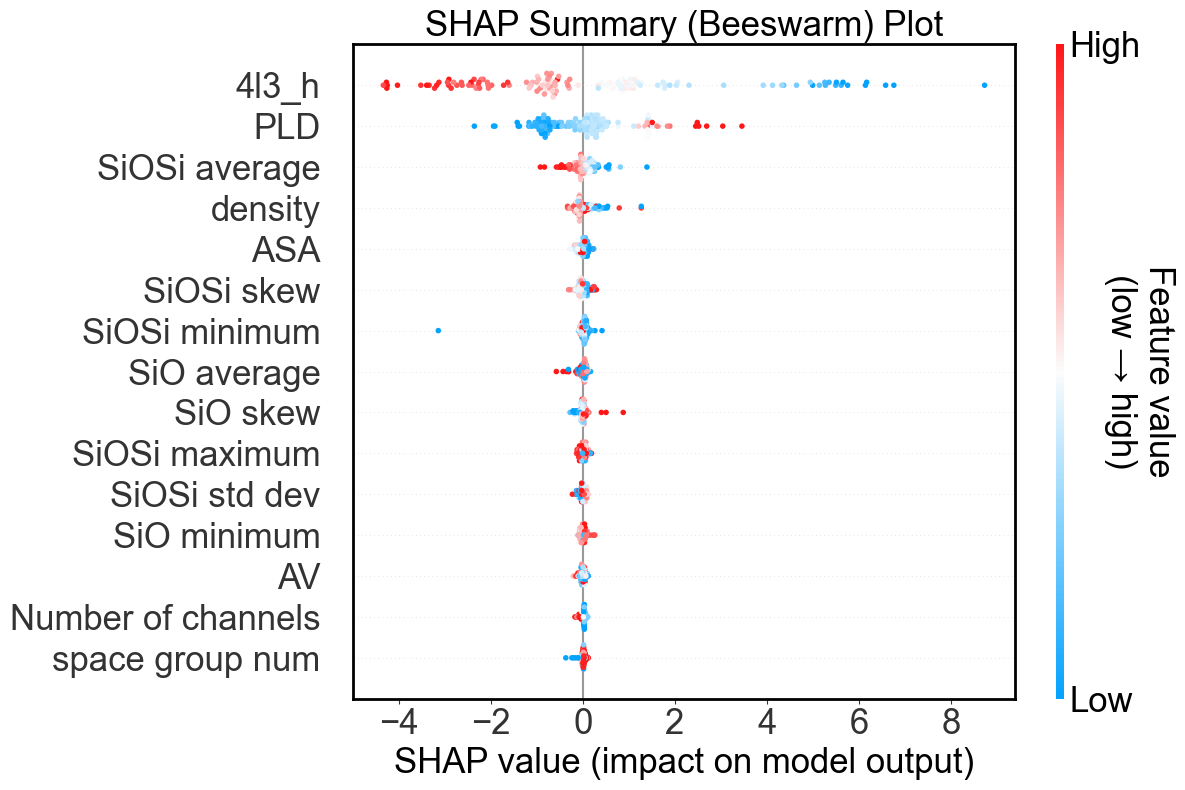

In [11]:
import shap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
# 0. Compute SHAP values
# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
explainer   = shap.Explainer(bst, X_train)
shap_values = explainer(X_train)

# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
# 1. Custom gradient (bright blue -> white -> bright red)
#    Matches the bar chart palette: blue ~=#02A2FF, red ~=#FF1616
# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
bright_blue = '#02A2FF'   # Primary C2- color
bright_red  = '#FF1616'   # Primary C3- color
mid_gray    = '#FCFCFC'   # Soft midpoint gray to avoid harsh white

cmap_b2r = LinearSegmentedColormap.from_list(
    'blue_to_red',
    [bright_blue, mid_gray, bright_red],
    N=256
)

# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
# 2. Figure and fonts
# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
FIGSIZE    = (12, 8)
LABEL_FONT = {'family': 'Arial', 'size': 25}
TICK_FONT  = {'fontname': 'Arial', 'size': 25}

fig, ax = plt.subplots(figsize=FIGSIZE)

# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
# 3. Beeswarm - use the new color map
# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
shap.plots.beeswarm(
    shap_values,
    max_display=15,
    ax=ax,
    plot_size=None,
    show=False,
    color=cmap_b2r
)

# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
# 4. Axis labels & fonts
# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
ax.set_title("SHAP Summary (Beeswarm) Plot", **LABEL_FONT)
ax.set_xlabel("SHAP value (impact on model output)", **LABEL_FONT)

for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontname(TICK_FONT['fontname'])
    lbl.set_fontsize(TICK_FONT['size'])

# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
# 5. Colorbar styling
# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
cbar_ax = fig.axes[-1]                                            # Colorbar axis
cbar_ax.tick_params(axis='y', labelsize=TICK_FONT['size'])
cbar_ax.set_ylabel("Feature value\n(low -> high)",                 # Direction hint
                   fontdict=LABEL_FONT, rotation=270, labelpad=25)

for lbl in cbar_ax.get_yticklabels():
    lbl.set_fontname(TICK_FONT['fontname'])

# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
# 6. Polish: remove grid and keep spines
# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)

# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
# 7. Save & show
# €€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€€
plt.tight_layout()
plt.savefig("shap_beeswarm_blue2red.png",
            dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()


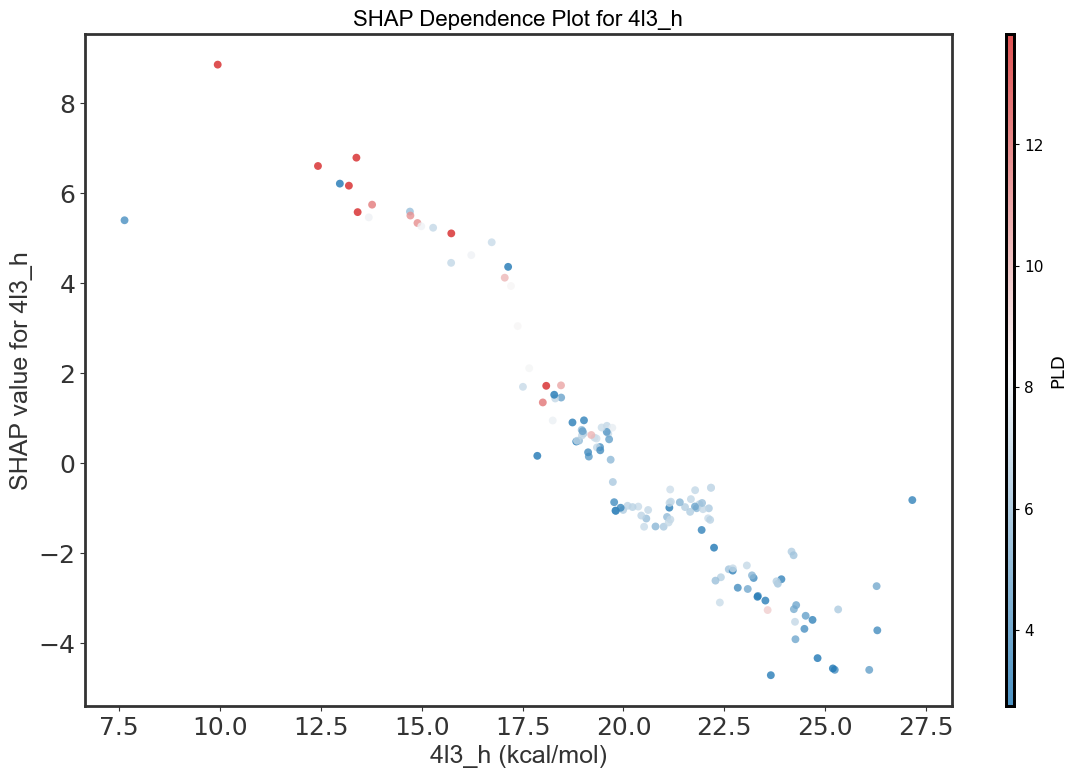

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap   # Added solely for the custom gradient

# ----------------
# 0. TreeExplainer computes SHAP
# ----------------
explainer   = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)            # Keep this call

# ----------------
# 1. Custom gradient that matches the bar chart (bright blue -> white -> bright red)
# ----------------
bright_blue = '#1f77b4'   # Primary C2- color
bright_red  = '#d62728'   # Primary C3- color
mid_gray    = '#f7f7f7'   # Light midpoint tuned to the palette
blue2red_cmap = LinearSegmentedColormap.from_list(
    'blue_to_red',
    [bright_blue, mid_gray, bright_red],
    N=256
)

# ----------------
# 2. Figure & dependence plot - only swap the cmap argument
# ----------------
fig, ax = plt.subplots(figsize=(12, 8))

plot_shap_values = shap_values[0] if isinstance(shap_values, list) else shap_values

shap.dependence_plot(
    '4l3_h',
    plot_shap_values,
    pd.DataFrame(X_train),
    ax=ax,
    dot_size=32,
    alpha=0.8,
    cmap=blue2red_cmap,          # Only change this argument
    show=False
)

# ----------------
# 3. Everything else stays the same
# ----------------
cbar = plt.gcf().axes[-1]
for spine in cbar.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2.0)

ax.set_title("SHAP Dependence Plot for 4l3_h", fontsize=16, family='Arial')
ax.set_xlabel("4l3_h (kcal/mol)", fontsize=18, family='Arial')
ax.set_ylabel("SHAP value for 4l3_h", fontsize=18, family='Arial')
ax.tick_params(axis='both', labelsize=18)

ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2.0)

plt.tight_layout(pad=1.5)
plt.savefig("shap_dependence_4l3_h_blue2red.png",
            dpi=600, bbox_inches='tight', pad_inches=0.2)
plt.show()


In [171]:
# 20000
target = '4l3'  # Current target variable
features = [
    f"{target}_h", 'density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV']

# Generate predictions
data_path = "data/prediction.csv"  # Replace with your dataset file path
data = pd.read_csv(data_path, encoding="latin1")
X = data[features]
d_X=xgb.DMatrix(X)
predictions = bst.predict(d_X)

# Build the output table
output_df = pd.DataFrame({
    'zeolite': data['zeolite'],  # Assumes the source data includes the zeolite column
    f'{target}_p': predictions  # Creates the <target>_p column
})

# Save as CSV
output_df.to_csv(f'{target}_20000.csv', index=False)

## Target: 6m1

In [24]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load data and split
data_path = "data/ml_6m.csv"
data = pd.read_csv(data_path, encoding="latin1")
X = data[[
    '6m1_h','density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]]
y = data['6m1']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 3. Parameter dictionary (matches the previous XGBRegressor hyperparameters)
# params = {
#     'colsample_bytree': 0.751078727740562,
#     'learning_rate': 0.018868451750361944,
#     'max_depth': 4,
#     'subsample': 0.6128404748491775,
#     'reg_alpha': 4.466446954338056,
#     'reg_lambda': 8.020262647468076,
#     'objective': 'reg:squarederror',
#     'seed': 42,
#     'verbosity': 0,
# }
params = {
    'colsample_bytree': 0.9769586636993889,
    'learning_rate': 0.2328172185521687,
    'max_depth': 3,
    'subsample': 0.5410788949714793,
    'reg_lambda': 7.725389485533198,
    'objective': 'reg:squarederror',
    'seed': 42,
    'verbosity': 0,
}

# 4. Call xgb.train and enable early stopping
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=539,                     # Matches n_estimators
    evals=[(dtest, "eval")],                 # Monitor validation RMSE
    early_stopping_rounds=20,                # Stop after 20 rounds with no improvement
    verbose_eval=True                        # Print the eval log each round
)

print(f"Best iteration: {bst.best_iteration}")
print(f"Best eval-score (RMSE): {bst.best_score:.5f}")

# 5. Predict & evaluate
y_train_pred = bst.predict(dtrain)
y_test_pred  = bst.predict(dtest)

print("\nTraining Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred),
    r2_score(y_train, y_train_pred)
))

print("\nTesting Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_test, y_test_pred),
    mean_absolute_error(y_test, y_test_pred),
    r2_score(y_test, y_test_pred)
))


[0]	eval-rmse:4.12425
[1]	eval-rmse:3.59642
[2]	eval-rmse:3.58008
[3]	eval-rmse:3.17772
[4]	eval-rmse:2.90194
[5]	eval-rmse:2.59712
[6]	eval-rmse:2.43380
[7]	eval-rmse:2.38009
[8]	eval-rmse:2.32233
[9]	eval-rmse:2.23295
[10]	eval-rmse:2.12505
[11]	eval-rmse:1.97642
[12]	eval-rmse:1.99651
[13]	eval-rmse:2.00630
[14]	eval-rmse:1.89045
[15]	eval-rmse:1.89873
[16]	eval-rmse:1.89403
[17]	eval-rmse:1.96450
[18]	eval-rmse:1.96573
[19]	eval-rmse:1.96404
[20]	eval-rmse:1.96694
[21]	eval-rmse:1.94389
[22]	eval-rmse:1.92988
[23]	eval-rmse:1.93513
[24]	eval-rmse:1.94172
[25]	eval-rmse:1.93667
[26]	eval-rmse:1.91628
[27]	eval-rmse:1.88253
[28]	eval-rmse:1.88191
[29]	eval-rmse:1.90343
[30]	eval-rmse:1.91143
[31]	eval-rmse:1.92249
[32]	eval-rmse:1.92627
[33]	eval-rmse:1.88900
[34]	eval-rmse:1.87095
[35]	eval-rmse:1.83766
[36]	eval-rmse:1.82339
[37]	eval-rmse:1.80856
[38]	eval-rmse:1.81662
[39]	eval-rmse:1.79456
[40]	eval-rmse:1.75482
[41]	eval-rmse:1.72772
[42]	eval-rmse:1.70569
[43]	eval-rmse:1.7083

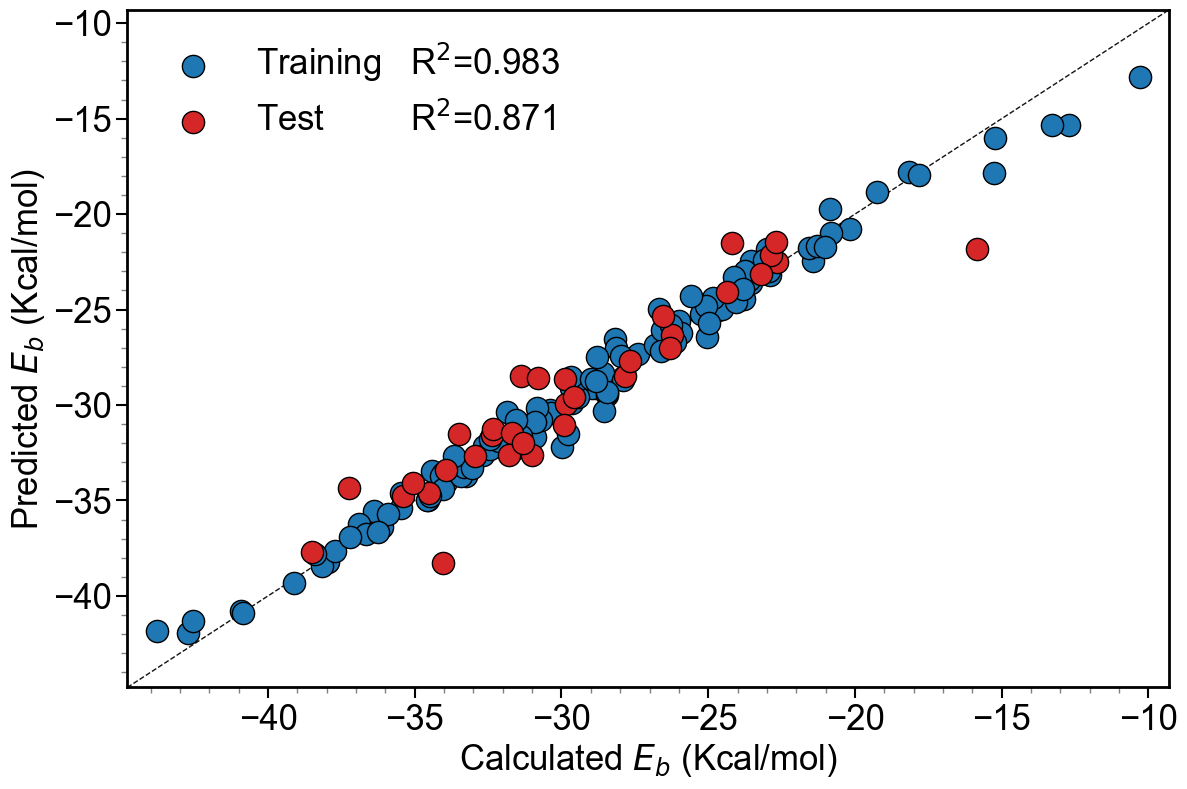

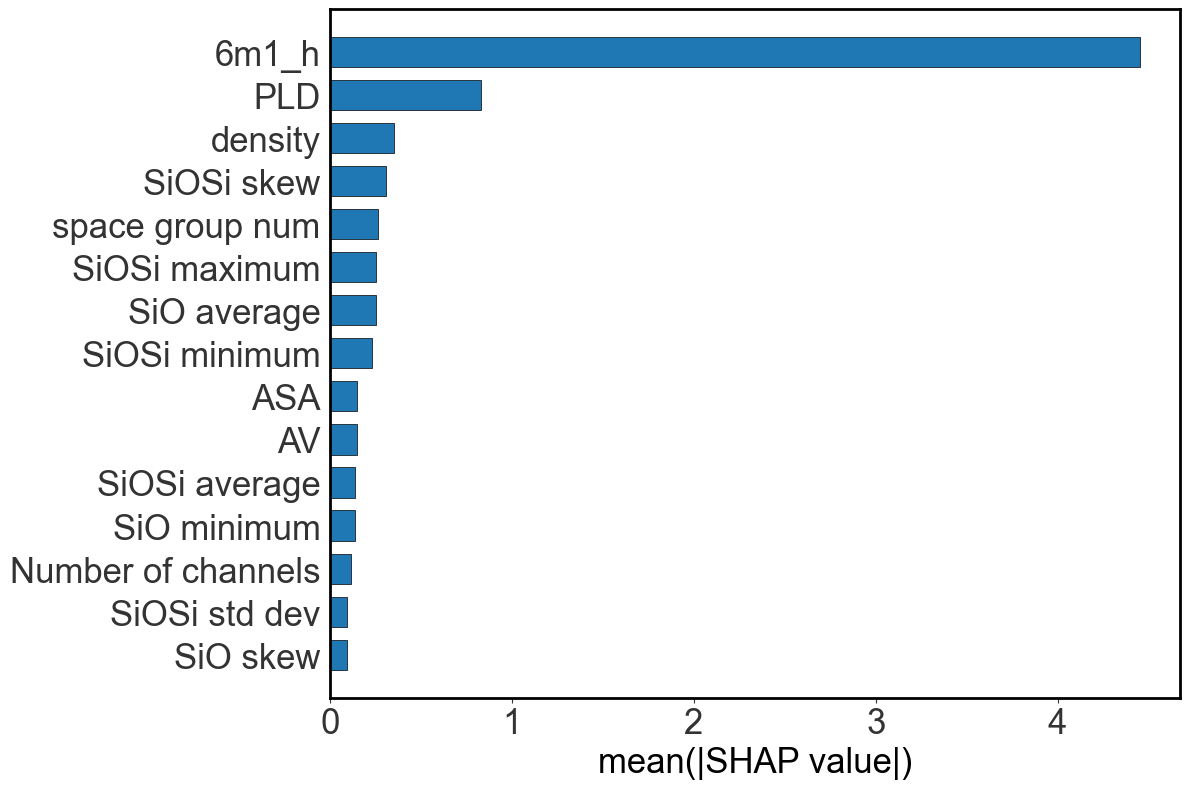

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assume y_train, y_test, y_train_pred, and y_test_pred already exist

# 1. Compute R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

# 2. Configure fonts
font       = {'family': 'Arial', 'size': 25}
ticks_font = {'fontname': 'Arial', 'size': 25}

# 3. Auto-compute axis range
x_min = min(np.min(y_train), np.min(y_test)) - 1
x_max = max(np.max(y_train), np.max(y_test)) + 1
diag  = np.linspace(x_min, x_max, 100)

# 4. Plot
fig, ax = plt.subplots(figsize=(12, 8))
dx = 256

# 4.1 Diagonal reference (no label or legend entry)
ax.plot(diag, diag, "--k", linewidth=1, zorder=1)


# Recommended palette (ColorBrewer friendly)
train_color = '#1f77b4'     
test_color  = '#d62728'     

# Fitted scatter plot
ax.scatter(
    y_train, y_train_pred,
    color=train_color,
    edgecolors='black',
    s=dx,                     # Marker size (e.g., dx=30)
    label=f"Training   R$^2$={r2_train:.3f}",
    zorder=2
)

ax.scatter(
    y_test, y_test_pred,
    color=test_color,
    edgecolors='black',
    s=dx,
    label=f"Test         R$^2$={r2_test:.3f}",
    zorder=2
)

# 5. Disable grid
ax.grid(False)

# 6. Add major/minor ticks
ax.minorticks_on()
# Major ticks: slightly longer and black
ax.tick_params(axis='both', which='major',
               direction='out', length=8, width=1.5, color='black')
# Minor ticks: shorter and lighter gray
ax.tick_params(axis='both', which='minor',
               direction='out', length=4, width=1, color='grey')

# 7. Tick label font
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontname(ticks_font['fontname'])
    lbl.set_fontsize(ticks_font['size'])

# 8. Axis labels: binding energy shorthand $E_b$
ax.set_xlabel("Calculated $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)
ax.set_ylabel("Predicted $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)

# 9. Force identical axis limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([x_min, x_max])

# 10. Keep only training/test legend entries
ax.legend(prop=font, frameon=False, loc='upper left')

# Set spine width
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

# 11. Save and show
plt.tight_layout()
plt.savefig('prediction_Eb_6m1.jpg', dpi=600)
plt.show()
import shap
import matplotlib.pyplot as plt

# --- 1. Compute SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)

# --- 2. Font and palette settings
font = {'family': 'Arial', 'size': 25}

# --- 3. Build a single 12x8 figure/axis
plt.style.use('default')  # Reset the style
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 100

# --- 4. Pass the axis into shap.summary_plot so it respects our figure size
shap.summary_plot(
    shap_values,
    X_train,
    plot_type="bar",
    max_display=15,
    show=False,
    plot_size=None  # Prevent SHAP from overriding the figure size
)

# --- 5. Style the active axis
current_ax = plt.gca()
current_ax.set_xlabel("mean(|SHAP value|)", fontdict=font)
current_ax.xaxis.set_major_locator(plt.MaxNLocator(5))
current_ax.grid(False)

# Set font
for lbl in current_ax.get_xticklabels() + current_ax.get_yticklabels():
    lbl.set_fontname('Arial')
    lbl.set_fontsize(25)

# Draw axis spines
for spine in current_ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2.0)

# Style the bar chart
for patch in current_ax.patches:
    patch.set_facecolor('#1f77b4')
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Style text annotations
for txt in current_ax.texts:
    txt.set_fontname('Arial')
    txt.set_fontsize(25)
    txt.set_color('#404040')

# --- 6. Save without tight cropping
plt.tight_layout()
fig = plt.gcf()  # Grab the current figure
fig.savefig(
    'shap_bar_6m1_correct.png',
    dpi=600,
    bbox_inches=None    # Keep the entire 12x8 canvas
)
plt.show()


In [198]:
# 20000
target = '6m1'  # Current target variable
features = [
    f"{target}_h", 'density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV']

# Generate predictions
data_path = "data/prediction.csv"  # Replace with your dataset file path
data = pd.read_csv(data_path, encoding="latin1")
X = data[features]
d_X=xgb.DMatrix(X)
predictions = bst.predict(d_X)

# Build the output table
output_df = pd.DataFrame({
    'zeolite': data['zeolite'],  # Assumes the source data includes the zeolite column
    f'{target}_p': predictions  # Creates the <target>_p column
})

# Save as CSV
output_df.to_csv(f'{target}_20000.csv', index=False)

In [199]:
import pandas as pd
import numpy as np
import xgboost as xgb

# 1. Define the target and features
target = '6m1'
features = [
    f"{target}_h", 'density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]

# 2. Load data
data = pd.read_csv("data/prediction.csv")
X = data[features]

# 3. Build the DMatrix and run inference
d_X = xgb.DMatrix(X, feature_names=X.columns.tolist())
preds = bst.predict(d_X)  # numpy array, shape=(n_samples,)

# 4. Set predictions to NaN when target_h is missing
mask = X[f"{target}_h"].isna().to_numpy()  # True indicates the row has missing target_h
preds[mask] = np.nan

# 5. Export
output_df = pd.DataFrame({
    'zeolite': data['zeolite'],
    f'{target}_p': preds
})
output_df.to_csv(f'{target}_20000.csv', index=False)
print("Saved:", f"{target}_20000.csv")


Saved: 6m1_20000.csv


## Target: 6m6

In [13]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load data and split
data_path = "data/ml_6m.csv"
data = pd.read_csv(data_path, encoding="latin1")
X = data[[
    '6m6_h','density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]]
y = data['6m6']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 3. Parameter dictionary (matches the previous XGBRegressor hyperparameters)
params = {
    'colsample_bytree': 0.8839138334727655,
    'learning_rate': 0.036303118948938104,
    'max_depth': 4,
    'subsample': 0.8700393899585829,
    'reg_alpha': 0.0036242747538846698,
    'reg_lambda': 2.189103165825256,
    'objective': 'reg:squarederror',
    'seed': 42,
    'verbosity': 0,
}

# 4. Call xgb.train and enable early stopping
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=539,                     # Matches n_estimators
    evals=[(dtest, "eval")],                 # Monitor validation RMSE
    early_stopping_rounds=20,                # Stop after 20 rounds with no improvement
    verbose_eval=True                        # Print the eval log each round
)

print(f"Best iteration: {bst.best_iteration}")
print(f"Best eval-score (RMSE): {bst.best_score:.5f}")

# 5. Predict & evaluate
y_train_pred = bst.predict(dtrain)
y_test_pred  = bst.predict(dtest)

print("\nTraining Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred),
    r2_score(y_train, y_train_pred)
))

print("\nTesting Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_test, y_test_pred),
    mean_absolute_error(y_test, y_test_pred),
    r2_score(y_test, y_test_pred)
))


[0]	eval-rmse:6.00397
[1]	eval-rmse:5.82914
[2]	eval-rmse:5.77287
[3]	eval-rmse:5.62707
[4]	eval-rmse:5.47102
[5]	eval-rmse:5.31644
[6]	eval-rmse:5.17420
[7]	eval-rmse:5.06631
[8]	eval-rmse:4.93722
[9]	eval-rmse:4.80124
[10]	eval-rmse:4.68811
[11]	eval-rmse:4.56803
[12]	eval-rmse:4.44893
[13]	eval-rmse:4.31874
[14]	eval-rmse:4.19728
[15]	eval-rmse:4.10504
[16]	eval-rmse:3.99345
[17]	eval-rmse:3.88851
[18]	eval-rmse:3.82660
[19]	eval-rmse:3.73333
[20]	eval-rmse:3.67128
[21]	eval-rmse:3.61898
[22]	eval-rmse:3.50962
[23]	eval-rmse:3.47965
[24]	eval-rmse:3.43093
[25]	eval-rmse:3.35883
[26]	eval-rmse:3.30186
[27]	eval-rmse:3.27353
[28]	eval-rmse:3.23024
[29]	eval-rmse:3.16797
[30]	eval-rmse:3.08969
[31]	eval-rmse:3.07794
[32]	eval-rmse:3.05960
[33]	eval-rmse:2.99547
[34]	eval-rmse:2.93006
[35]	eval-rmse:2.87955
[36]	eval-rmse:2.84978
[37]	eval-rmse:2.81292
[38]	eval-rmse:2.76600
[39]	eval-rmse:2.74284
[40]	eval-rmse:2.73421
[41]	eval-rmse:2.70031
[42]	eval-rmse:2.67548
[43]	eval-rmse:2.6570

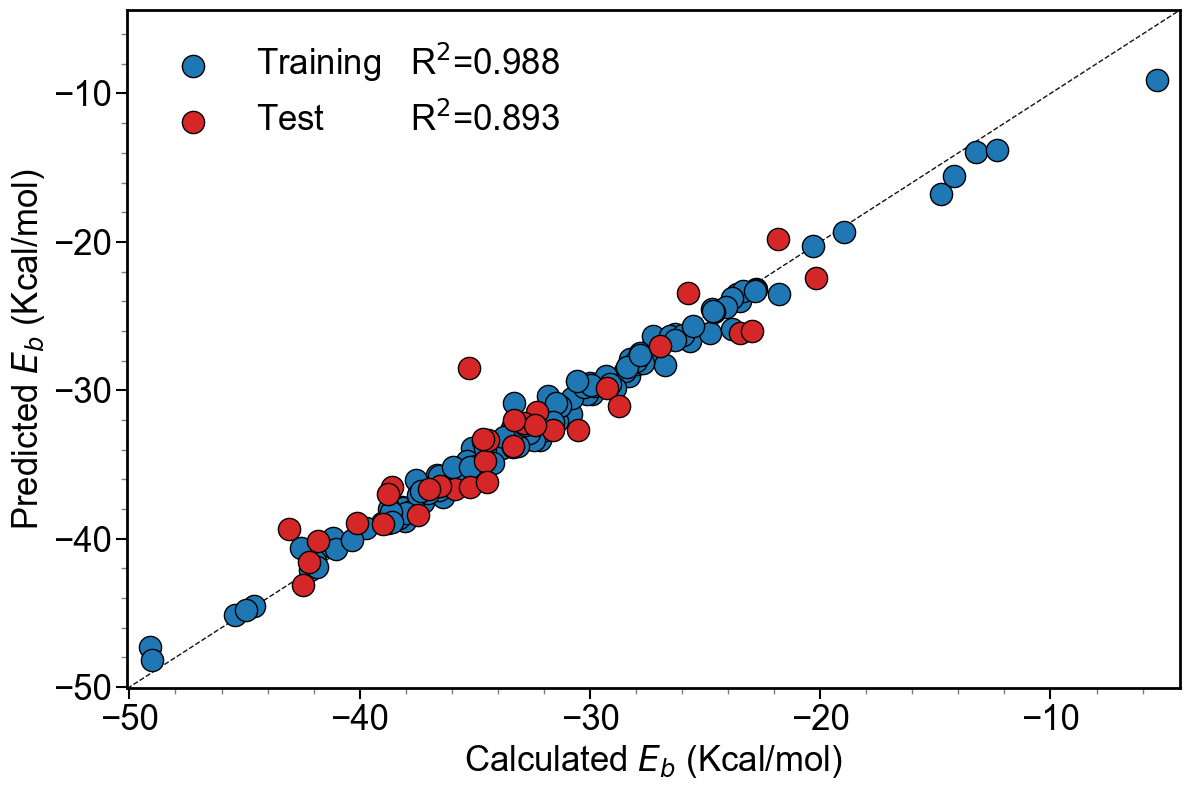

The figure layout has changed to tight


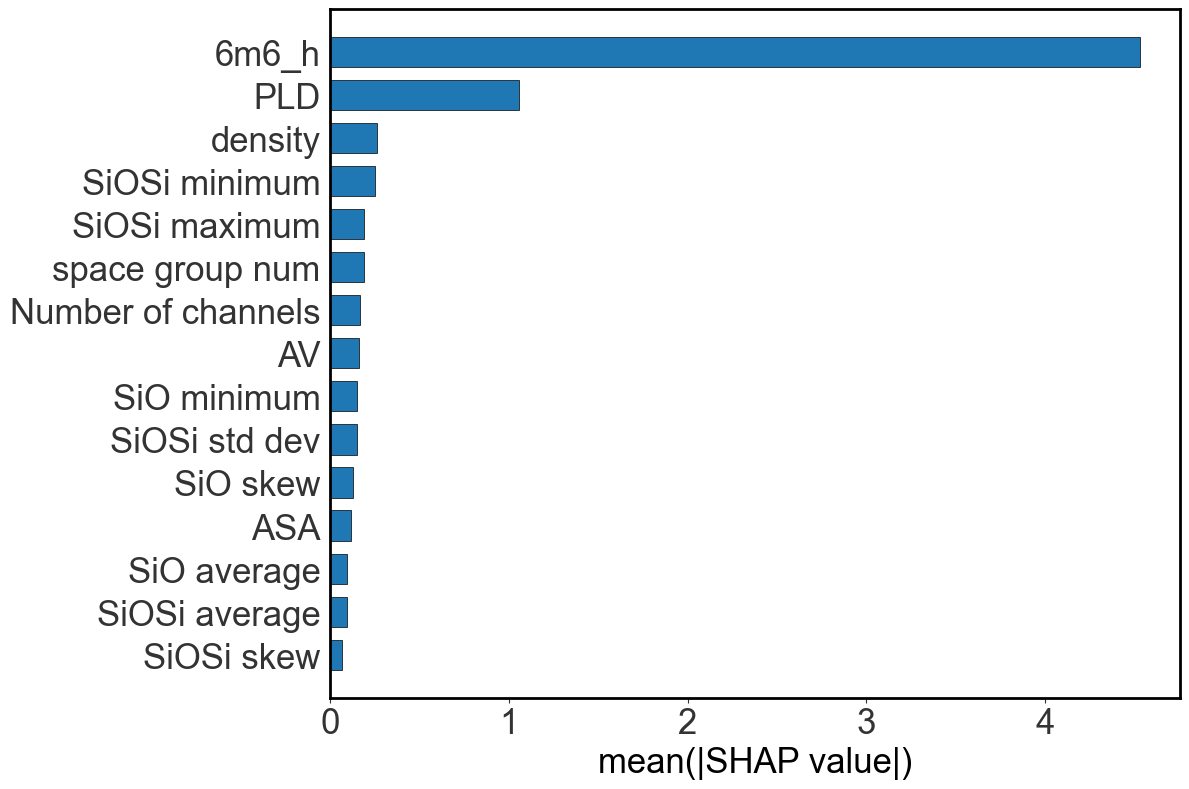

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assume y_train, y_test, y_train_pred, and y_test_pred already exist

# 1. Compute R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

# 2. Configure fonts
font       = {'family': 'Arial', 'size': 25}
ticks_font = {'fontname': 'Arial', 'size': 25}

# 3. Auto-compute axis range
x_min = min(np.min(y_train), np.min(y_test)) - 1
x_max = max(np.max(y_train), np.max(y_test)) + 1
diag  = np.linspace(x_min, x_max, 100)

# 4. Plot
fig, ax = plt.subplots(figsize=(12, 8))
dx = 256

# 4.1 Diagonal reference (no label or legend entry)
ax.plot(diag, diag, "--k", linewidth=1, zorder=1)


# Recommended palette (ColorBrewer friendly)
train_color = '#1f77b4'     
test_color  = '#d62728'     

# Fitted scatter plot
ax.scatter(
    y_train, y_train_pred,
    color=train_color,
    edgecolors='black',
    s=dx,                     # Marker size (e.g., dx=30)
    label=f"Training   R$^2$={r2_train:.3f}",
    zorder=2
)

ax.scatter(
    y_test, y_test_pred,
    color=test_color,
    edgecolors='black',
    s=dx,
    label=f"Test         R$^2$={r2_test:.3f}",
    zorder=2
)

# 5. Disable grid
ax.grid(False)

# 6. Add major/minor ticks
ax.minorticks_on()
# Major ticks: slightly longer and black
ax.tick_params(axis='both', which='major',
               direction='out', length=8, width=1.5, color='black')
# Minor ticks: shorter and lighter gray
ax.tick_params(axis='both', which='minor',
               direction='out', length=4, width=1, color='grey')

# 7. Tick label font
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontname(ticks_font['fontname'])
    lbl.set_fontsize(ticks_font['size'])

# 8. Axis labels: binding energy shorthand $E_b$
ax.set_xlabel("Calculated $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)
ax.set_ylabel("Predicted $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)

# 9. Force identical axis limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([x_min, x_max])

# 10. Keep only training/test legend entries
ax.legend(prop=font, frameon=False, loc='upper left')

# Set spine width
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

# 11. Save and show
plt.tight_layout()
plt.savefig('prediction_Eb_6m6.jpg', dpi=600)
plt.show()
import shap
import matplotlib.pyplot as plt

# --- 1. Compute SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)

# --- 2. Font and palette settings
font = {'family': 'Arial', 'size': 25}

# --- 3. Build a single 12x8 figure/axis
plt.style.use('default')  # Reset the style
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 100

# --- 4. Pass the axis into shap.summary_plot so it respects our figure size
shap.summary_plot(
    shap_values,
    X_train,
    plot_type="bar",
    max_display=15,
    show=False,
    plot_size=None  # Prevent SHAP from overriding the figure size
)

# --- 5. Style the active axis
current_ax = plt.gca()
current_ax.set_xlabel("mean(|SHAP value|)", fontdict=font)
current_ax.xaxis.set_major_locator(plt.MaxNLocator(5))
current_ax.grid(False)

# Set font
for lbl in current_ax.get_xticklabels() + current_ax.get_yticklabels():
    lbl.set_fontname('Arial')
    lbl.set_fontsize(25)

# Draw axis spines
for spine in current_ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2.0)

# Style the bar chart
for patch in current_ax.patches:
    patch.set_facecolor('#1f77b4')
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Style text annotations
for txt in current_ax.texts:
    txt.set_fontname('Arial')
    txt.set_fontsize(25)
    txt.set_color('#404040')

# --- 6. Save without tight cropping
plt.tight_layout()
fig = plt.gcf()  # Grab the current figure
fig.savefig(
    'shap_bar_6m6_correct.png',
    dpi=600,
    bbox_inches=None    # Keep the entire 12x8 canvas
)
plt.show()


In [196]:
import pandas as pd
import numpy as np
import xgboost as xgb

# 1. Define the target and features
target = '6m6'
features = [
    f"{target}_h", 'density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]

# 2. Load data
data = pd.read_csv("data/prediction.csv")
X = data[features]

# 3. Build the DMatrix and run inference
d_X = xgb.DMatrix(X, feature_names=X.columns.tolist())
preds = bst.predict(d_X)  # numpy array, shape=(n_samples,)

# 4. Set predictions to NaN when target_h is missing
mask = X[f"{target}_h"].isna().to_numpy()  # True indicates the row has missing target_h
preds[mask] = np.nan

# 5. Export
output_df = pd.DataFrame({
    'zeolite': data['zeolite'],
    f'{target}_p': preds
})
output_df.to_csv(f'{target}_20000.csv', index=False)
print("Saved:", f"{target}_20000.csv")


Saved: 6m6_20000.csv


## Target: 6m11

In [32]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load data and split
data_path = "data/ml_6m.csv"
data = pd.read_csv(data_path, encoding="latin1")
X = data[[
    '6m11_h','density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]]
y = data['6m11']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

params = {
    'colsample_bytree': 0.9443299298835781,
    'learning_rate': 0.01805848395203946,
    'max_depth': 6,
    'subsample': 0.5276124001017958,
    'reg_lambda': 0.0100815664830862,
    'objective': 'reg:squarederror',
    'seed': 42,
    'verbosity': 0,
}


# 4. Call xgb.train and enable early stopping
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=539,                     # Matches n_estimators
    evals=[(dtest, "eval")],                 # Monitor validation RMSE
    early_stopping_rounds=10,                # Stop after 10 rounds with no improvement
    verbose_eval=True                        # Print the eval log each round
)

print(f"Best iteration: {bst.best_iteration}")
print(f"Best eval-score (RMSE): {bst.best_score:.5f}")

# 5. Predict & evaluate
y_train_pred = bst.predict(dtrain)
y_test_pred  = bst.predict(dtest)

print("\nTraining Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred),
    r2_score(y_train, y_train_pred)
))

print("\nTesting Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_test, y_test_pred),
    mean_absolute_error(y_test, y_test_pred),
    r2_score(y_test, y_test_pred)
))


[0]	eval-rmse:5.60224
[1]	eval-rmse:5.53107
[2]	eval-rmse:5.51939
[3]	eval-rmse:5.42470
[4]	eval-rmse:5.34450
[5]	eval-rmse:5.25242
[6]	eval-rmse:5.16858
[7]	eval-rmse:5.06232
[8]	eval-rmse:4.97233
[9]	eval-rmse:4.87602


[10]	eval-rmse:4.77887
[11]	eval-rmse:4.72103
[12]	eval-rmse:4.64723
[13]	eval-rmse:4.56471
[14]	eval-rmse:4.48926
[15]	eval-rmse:4.43375
[16]	eval-rmse:4.37570
[17]	eval-rmse:4.30283
[18]	eval-rmse:4.22946
[19]	eval-rmse:4.15487
[20]	eval-rmse:4.08552
[21]	eval-rmse:4.04169
[22]	eval-rmse:3.98924
[23]	eval-rmse:3.97520
[24]	eval-rmse:3.91652
[25]	eval-rmse:3.87928
[26]	eval-rmse:3.82068
[27]	eval-rmse:3.82456
[28]	eval-rmse:3.77444
[29]	eval-rmse:3.72069
[30]	eval-rmse:3.68919
[31]	eval-rmse:3.67955
[32]	eval-rmse:3.67941
[33]	eval-rmse:3.62464
[34]	eval-rmse:3.57406
[35]	eval-rmse:3.53937
[36]	eval-rmse:3.50921
[37]	eval-rmse:3.46491
[38]	eval-rmse:3.42157
[39]	eval-rmse:3.40813
[40]	eval-rmse:3.36520
[41]	eval-rmse:3.31407
[42]	eval-rmse:3.26065
[43]	eval-rmse:3.22649
[44]	eval-rmse:3.17560
[45]	eval-rmse:3.13140
[46]	eval-rmse:3.08801
[47]	eval-rmse:3.05071
[48]	eval-rmse:3.00088
[49]	eval-rmse:2.96310
[50]	eval-rmse:2.92365
[51]	eval-rmse:2.88499
[52]	eval-rmse:2.84719
[53]	eval-r

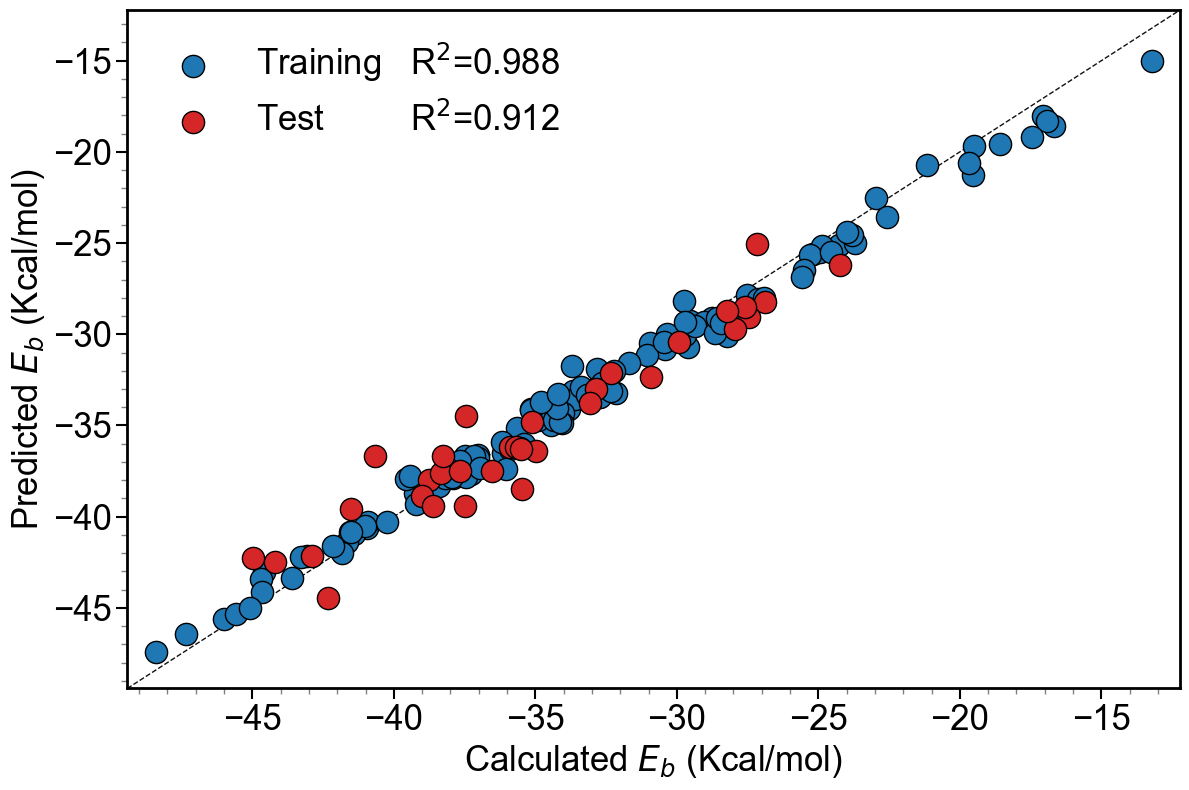

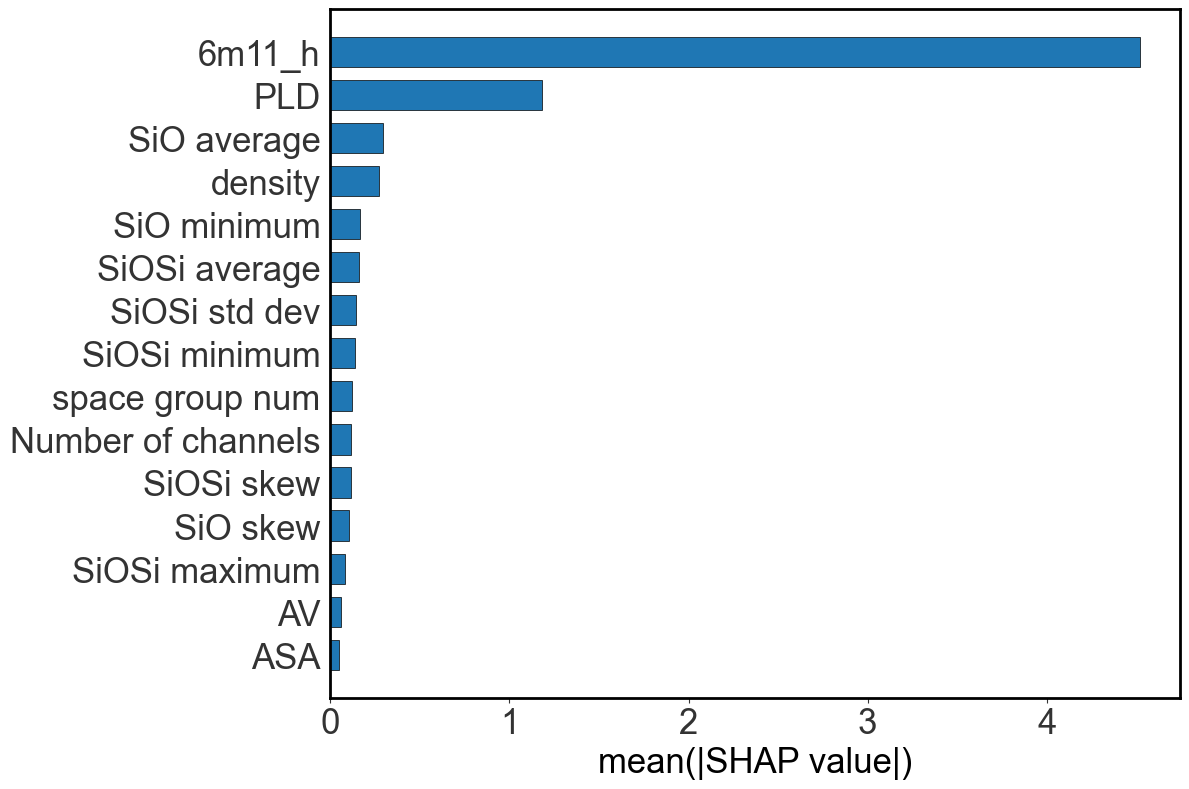

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assume y_train, y_test, y_train_pred, and y_test_pred already exist

# 1. Compute R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

# 2. Configure fonts
font       = {'family': 'Arial', 'size': 25}
ticks_font = {'fontname': 'Arial', 'size': 25}

# 3. Auto-compute axis range
x_min = min(np.min(y_train), np.min(y_test)) - 1
x_max = max(np.max(y_train), np.max(y_test)) + 1
diag  = np.linspace(x_min, x_max, 100)

# 4. Plot
fig, ax = plt.subplots(figsize=(12, 8))
dx = 256

# 4.1 Diagonal reference (no label or legend entry)
ax.plot(diag, diag, "--k", linewidth=1, zorder=1)


# Recommended palette (ColorBrewer friendly)
train_color = '#1f77b4'     
test_color  = '#d62728'     

# Fitted scatter plot
ax.scatter(
    y_train, y_train_pred,
    color=train_color,
    edgecolors='black',
    s=dx,                     # Marker size (e.g., dx=30)
    label=f"Training   R$^2$={r2_train:.3f}",
    zorder=2
)

ax.scatter(
    y_test, y_test_pred,
    color=test_color,
    edgecolors='black',
    s=dx,
    label=f"Test         R$^2$={r2_test:.3f}",
    zorder=2
)

# 5. Disable grid
ax.grid(False)

# 6. Add major/minor ticks
ax.minorticks_on()
# Major ticks: slightly longer and black
ax.tick_params(axis='both', which='major',
               direction='out', length=8, width=1.5, color='black')
# Minor ticks: shorter and lighter gray
ax.tick_params(axis='both', which='minor',
               direction='out', length=4, width=1, color='grey')

# 7. Tick label font
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontname(ticks_font['fontname'])
    lbl.set_fontsize(ticks_font['size'])

# 8. Axis labels: binding energy shorthand $E_b$
ax.set_xlabel("Calculated $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)
ax.set_ylabel("Predicted $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)

# 9. Force identical axis limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([x_min, x_max])

# 10. Keep only training/test legend entries
ax.legend(prop=font, frameon=False, loc='upper left')

# Set spine width
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

# 11. Save and show
plt.tight_layout()
plt.savefig('prediction_Eb_6m11.jpg', dpi=600)
plt.show()
import shap
import matplotlib.pyplot as plt

# --- 1. Compute SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)

# --- 2. Font and palette settings
font = {'family': 'Arial', 'size': 25}

# --- 3. Build a single 12x8 figure/axis
plt.style.use('default')  # Reset the style
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 100

# --- 4. Pass the axis into shap.summary_plot so it respects our figure size
shap.summary_plot(
    shap_values,
    X_train,
    plot_type="bar",
    max_display=15,
    show=False,
    plot_size=None  # Prevent SHAP from overriding the figure size
)

# --- 5. Style the active axis
current_ax = plt.gca()
current_ax.set_xlabel("mean(|SHAP value|)", fontdict=font)
current_ax.xaxis.set_major_locator(plt.MaxNLocator(5))
current_ax.grid(False)

# Set font
for lbl in current_ax.get_xticklabels() + current_ax.get_yticklabels():
    lbl.set_fontname('Arial')
    lbl.set_fontsize(25)

# Draw axis spines
for spine in current_ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2.0)

# Style the bar chart
for patch in current_ax.patches:
    patch.set_facecolor('#1f77b4')
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Style text annotations
for txt in current_ax.texts:
    txt.set_fontname('Arial')
    txt.set_fontsize(25)
    txt.set_color('#404040')

# --- 6. Save without tight cropping
plt.tight_layout()
fig = plt.gcf()  # Grab the current figure
fig.savefig(
    'shap_bar_6m11_correct.png',
    dpi=600,
    bbox_inches=None    # Keep the entire 12x8 canvas
)
plt.show()


In [178]:
# 20000
target = '6m11'  # Current target variable
features = [
    f"{target}_h", 'density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV']

# Generate predictions
data_path = "data/prediction.csv"  # Replace with your dataset file path
data = pd.read_csv(data_path, encoding="latin1")
X = data[features]
d_X=xgb.DMatrix(X)
predictions = bst.predict(d_X)

# Build the output table
output_df = pd.DataFrame({
    'zeolite': data['zeolite'],  # Assumes the source data includes the zeolite column
    f'{target}_p': predictions  # Creates the <target>_p column
})

# Save as CSV
output_df.to_csv(f'{target}_20000.csv', index=False)

In [194]:
import pandas as pd
import numpy as np
import xgboost as xgb

# 1. Define the target and features
target = '6m11'
features = [
    f"{target}_h", 'density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]

# 2. Load data
data = pd.read_csv("data/prediction.csv")
X = data[features]

# 3. Build the DMatrix and run inference
d_X = xgb.DMatrix(X, feature_names=X.columns.tolist())
preds = bst.predict(d_X)  # numpy array, shape=(n_samples,)

# 4. Set predictions to NaN when target_h is missing
mask = X[f"{target}_h"].isna().to_numpy()  # True indicates the row has missing target_h
preds[mask] = np.nan

# 5. Export
output_df = pd.DataFrame({
    'zeolite': data['zeolite'],
    f'{target}_p': preds
})
output_df.to_csv(f'{target}_20000.csv', index=False)
print("Saved:", f"{target}_20000.csv")


Saved: 6m11_20000.csv


## Target: 6l3

In [34]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load data and split
data_path = "data/ml_6m.csv"
data = pd.read_csv(data_path, encoding="latin1")
X = data[[
    '6l3_h','density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]]
y = data['6l3']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

params = {
    'colsample_bytree': 0.7433134335874936,
    'learning_rate': 0.056323021163613644,
    'max_depth': 4,
    'subsample': 0.6906056609929014,
    'reg_lambda': 0.14391715351409642,
    'objective': 'reg:squarederror',
    'seed': 42,
    'verbosity': 0,
}

# 4. Call xgb.train and enable early stopping
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=539,                     # Matches n_estimators
    evals=[(dtest, "eval")],                 # Monitor validation RMSE
    early_stopping_rounds=10,                # Stop after 10 rounds with no improvement
    verbose_eval=True                        # Print the eval log each round
)

print(f"Best iteration: {bst.best_iteration}")
print(f"Best eval-score (RMSE): {bst.best_score:.5f}")

# 5. Predict & evaluate
y_train_pred = bst.predict(dtrain)
y_test_pred  = bst.predict(dtest)

print("\nTraining Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred),
    r2_score(y_train, y_train_pred)
))

print("\nTesting Set Performance:")
print(" MSE: {:.3f}, MAE: {:.3f}, R2: {:.3f}".format(
    mean_squared_error(y_test, y_test_pred),
    mean_absolute_error(y_test, y_test_pred),
    r2_score(y_test, y_test_pred)
))


[0]	eval-rmse:4.71149
[1]	eval-rmse:4.51602
[2]	eval-rmse:4.44080
[3]	eval-rmse:4.32668
[4]	eval-rmse:4.16303
[5]	eval-rmse:4.16991
[6]	eval-rmse:4.00314
[7]	eval-rmse:3.85105
[8]	eval-rmse:3.71062
[9]	eval-rmse:3.64191
[10]	eval-rmse:3.47992
[11]	eval-rmse:3.39904
[12]	eval-rmse:3.30012
[13]	eval-rmse:3.19864
[14]	eval-rmse:3.09902
[15]	eval-rmse:3.00688


[16]	eval-rmse:2.97908
[17]	eval-rmse:2.90652
[18]	eval-rmse:2.81607
[19]	eval-rmse:2.75158
[20]	eval-rmse:2.66127
[21]	eval-rmse:2.59875
[22]	eval-rmse:2.51158
[23]	eval-rmse:2.47213
[24]	eval-rmse:2.42556
[25]	eval-rmse:2.40352
[26]	eval-rmse:2.35964
[27]	eval-rmse:2.32326
[28]	eval-rmse:2.30278
[29]	eval-rmse:2.25851
[30]	eval-rmse:2.21845
[31]	eval-rmse:2.19209
[32]	eval-rmse:2.15661
[33]	eval-rmse:2.13875
[34]	eval-rmse:2.08360
[35]	eval-rmse:2.05336
[36]	eval-rmse:2.02350
[37]	eval-rmse:2.00438
[38]	eval-rmse:1.96642
[39]	eval-rmse:1.95187
[40]	eval-rmse:1.94708
[41]	eval-rmse:1.92993
[42]	eval-rmse:1.93427
[43]	eval-rmse:1.94808
[44]	eval-rmse:1.94057
[45]	eval-rmse:1.93415
[46]	eval-rmse:1.91788
[47]	eval-rmse:1.89634
[48]	eval-rmse:1.89321
[49]	eval-rmse:1.89044
[50]	eval-rmse:1.88392
[51]	eval-rmse:1.86918
[52]	eval-rmse:1.86159
[53]	eval-rmse:1.84882
[54]	eval-rmse:1.84603
[55]	eval-rmse:1.82616
[56]	eval-rmse:1.79792
[57]	eval-rmse:1.76561
[58]	eval-rmse:1.75187
[59]	eval-r

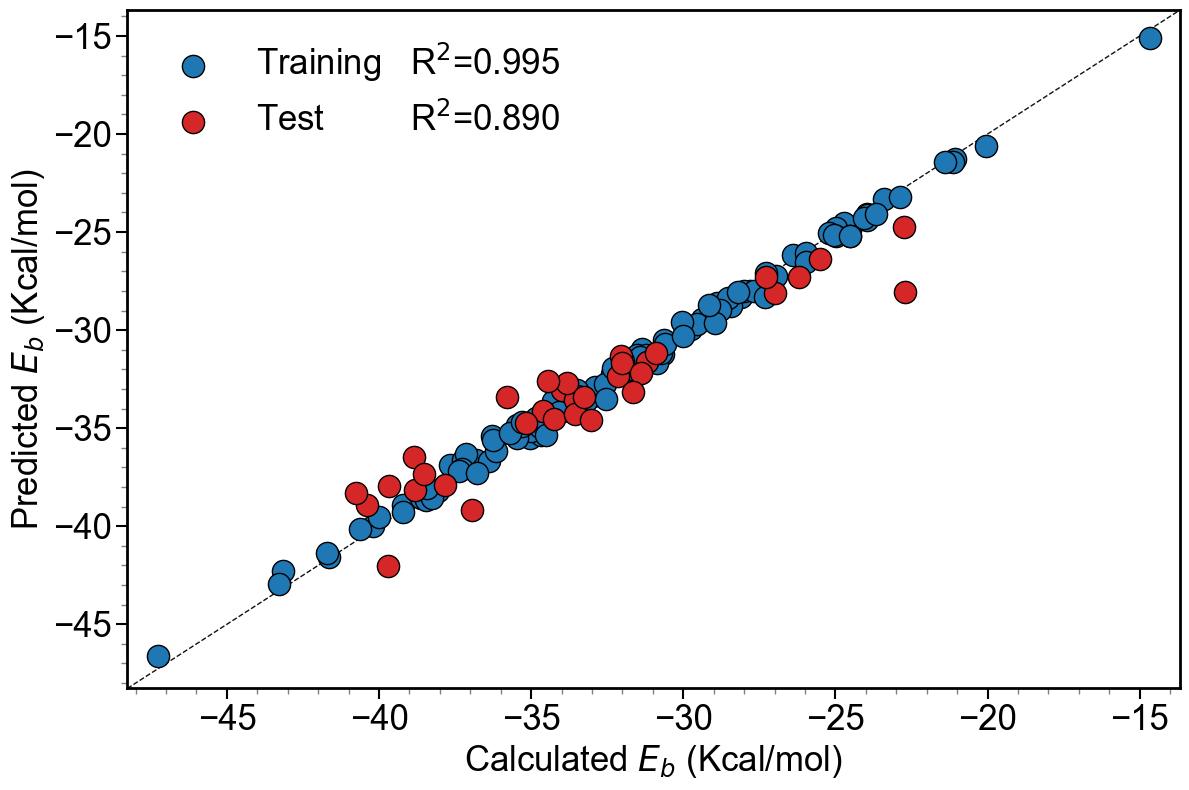

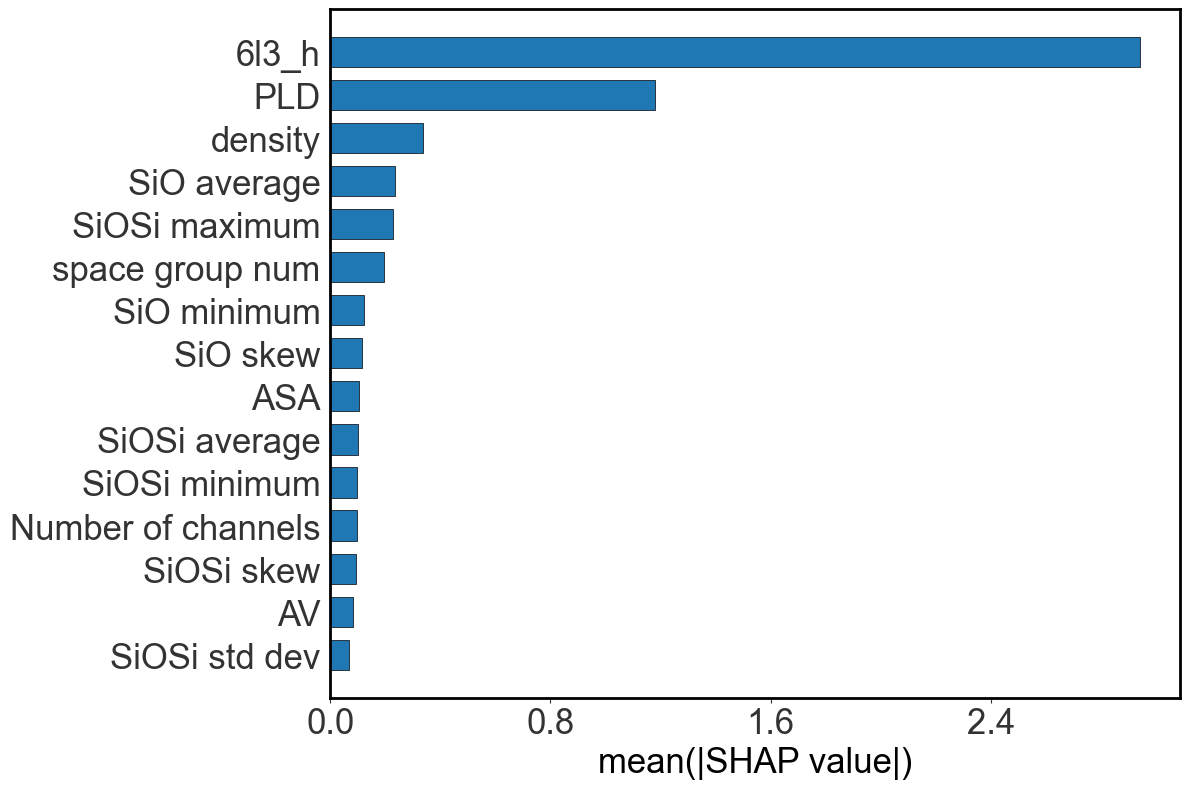

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assume y_train, y_test, y_train_pred, and y_test_pred already exist

# 1. Compute R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

# 2. Configure fonts
font       = {'family': 'Arial', 'size': 25}
ticks_font = {'fontname': 'Arial', 'size': 25}

# 3. Auto-compute axis range
x_min = min(np.min(y_train), np.min(y_test)) - 1
x_max = max(np.max(y_train), np.max(y_test)) + 1
diag  = np.linspace(x_min, x_max, 100)

# 4. Plot
fig, ax = plt.subplots(figsize=(12, 8))
dx = 256

# 4.1 Diagonal reference (no label or legend entry)
ax.plot(diag, diag, "--k", linewidth=1, zorder=1)


# Recommended palette (ColorBrewer friendly)
train_color = '#1f77b4'     
test_color  = '#d62728'     

# Fitted scatter plot
ax.scatter(
    y_train, y_train_pred,
    color=train_color,
    edgecolors='black',
    s=dx,                     # Marker size (e.g., dx=30)
    label=f"Training   R$^2$={r2_train:.3f}",
    zorder=2
)

ax.scatter(
    y_test, y_test_pred,
    color=test_color,
    edgecolors='black',
    s=dx,
    label=f"Test         R$^2$={r2_test:.3f}",
    zorder=2
)

# 5. Disable grid
ax.grid(False)

# 6. Add major/minor ticks
ax.minorticks_on()
# Major ticks: slightly longer and black
ax.tick_params(axis='both', which='major',
               direction='out', length=8, width=1.5, color='black')
# Minor ticks: shorter and lighter gray
ax.tick_params(axis='both', which='minor',
               direction='out', length=4, width=1, color='grey')

# 7. Tick label font
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontname(ticks_font['fontname'])
    lbl.set_fontsize(ticks_font['size'])

# 8. Axis labels: binding energy shorthand $E_b$
ax.set_xlabel("Calculated $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)
ax.set_ylabel("Predicted $\\it{E}_{b}$ (Kcal/mol)", fontdict=font)

# 9. Force identical axis limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([x_min, x_max])

# 10. Keep only training/test legend entries
ax.legend(prop=font, frameon=False, loc='upper left')

# Set spine width
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

# 11. Save and show
plt.tight_layout()
plt.savefig('prediction_Eb_6l3.jpg', dpi=600)
plt.show()
import shap
import matplotlib.pyplot as plt

# --- 1. Compute SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)

# --- 2. Font and palette settings
font = {'family': 'Arial', 'size': 25}

# --- 3. Build a single 12x8 figure/axis
plt.style.use('default')  # Reset the style
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 100

# --- 4. Pass the axis into shap.summary_plot so it respects our figure size
shap.summary_plot(
    shap_values,
    X_train,
    plot_type="bar",
    max_display=15,
    show=False,
    plot_size=None  # Prevent SHAP from overriding the figure size
)

# --- 5. Style the active axis
current_ax = plt.gca()
current_ax.set_xlabel("mean(|SHAP value|)", fontdict=font)
current_ax.xaxis.set_major_locator(plt.MaxNLocator(5))
current_ax.grid(False)

# Set font
for lbl in current_ax.get_xticklabels() + current_ax.get_yticklabels():
    lbl.set_fontname('Arial')
    lbl.set_fontsize(25)

# Draw axis spines
for spine in current_ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2.0)

# Style the bar chart
for patch in current_ax.patches:
    patch.set_facecolor('#1f77b4')
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Style text annotations
for txt in current_ax.texts:
    txt.set_fontname('Arial')
    txt.set_fontsize(25)
    txt.set_color('#404040')

# --- 6. Save without tight cropping
plt.tight_layout()
fig = plt.gcf()  # Grab the current figure
fig.savefig(
    'shap_bar_6l3_correct.png',
    dpi=600,
    bbox_inches=None    # Keep the entire 12x8 canvas
)
plt.show()


In [180]:
# 20000
target = '6l3'  # Current target variable
features = [
    f"{target}_h", 'density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV']

# Generate predictions
data_path = "data/prediction.csv"  # Replace with your dataset file path
data = pd.read_csv(data_path, encoding="latin1")
X = data[features]
d_X=xgb.DMatrix(X)
predictions = bst.predict(d_X)

# Build the output table
output_df = pd.DataFrame({
    'zeolite': data['zeolite'],  # Assumes the source data includes the zeolite column
    f'{target}_p': predictions  # Creates the <target>_p column
})

# Save as CSV
output_df.to_csv(f'{target}_20000.csv', index=False)

In [191]:
import pandas as pd
import numpy as np
import xgboost as xgb

# 1. Define the target and features
target = '6l3'
features = [
    f"{target}_h", 'density','space group num','SiO average','SiO minimum','SiO skew',
    'SiOSi average','SiOSi maximum','SiOSi minimum','SiOSi skew','SiOSi std dev',
    'PLD','ASA','Number of channels','AV'
]

# 2. Load data
data = pd.read_csv("data/prediction.csv")
X = data[features]

# 3. Build the DMatrix and run inference
d_X = xgb.DMatrix(X, feature_names=X.columns.tolist())
preds = bst.predict(d_X)  # numpy array, shape=(n_samples,)

# 4. Set predictions to NaN when target_h is missing
mask = X[f"{target}_h"].isna().to_numpy()  # True indicates the row has missing target_h
preds[mask] = np.nan

# 5. Export
output_df = pd.DataFrame({
    'zeolite': data['zeolite'],
    f'{target}_p': preds
})
output_df.to_csv(f'{target}_20000.csv', index=False)
print("Saved:", f"{target}_20000.csv")


Saved: 6l3_20000.csv


In [200]:
import pandas as pd
from functools import reduce

# 1. List the prefixes in order
prefixes = ['4m1', '4m6', '4m11', '4l3', '6m1', '6m6', '6m11', '6l3']

# 2. Read each CSV and merge into one DataFrame
#    Approach A: iteratively merge
dfs = []
for pre in prefixes:
    fn = f'{pre}_20000.csv'
    df = pd.read_csv(fn)          # Contains ['zeolite', '{pre}_p']
    dfs.append(df)

# Merge pairwise
merged = reduce(lambda left, right: pd.merge(left, right, on='zeolite'), dfs)

# 3. Save
merged.to_csv('merged_20000.csv', index=False)
print("Merge complete: merged_20000.csv")


Merge complete: merged_20000.csv


In [ ]:
import pandas as pd

# --- Configuration --- 
INPUT_CSV  = "20000_p.csv"    # Source file
OUTPUT_CSV = "output.csv"   # Filtered output file

# 1. Load data
df = pd.read_csv(INPUT_CSV)

# 2. Filter rows whose zeolite ID does not contain '1'
#    Cast to string first if needed
mask = ~df['zeolite'].astype(str).str.contains('1')
df_filtered = df[mask]

# 3. Save the result
df_filtered.to_csv(OUTPUT_CSV, index=False)

print(f"Removed {len(df) - len(df_filtered)} rows; saved to {OUTPUT_CSV}")


In [202]:
import pandas as pd

# --- Configuration --- 
INPUT_CSV  = "20000_p.csv"    # Source file
OUTPUT_CSV = "iza_p.csv"   # Filtered output file

# 1. Load data
df = pd.read_csv(INPUT_CSV)

# 2. Filter rows whose zeolite ID does not contain '1'
#    Cast to string first if needed
mask = ~df['zeolite'].astype(str).str.contains('1')
df_filtered = df[mask]

# 3. Save the result
df_filtered.to_csv(OUTPUT_CSV, index=False)

print(f"Removed {len(df) - len(df_filtered)} rows; saved to {OUTPUT_CSV}")


Removed 11711 rows; saved to iza_p.csv